# MALWARE Detection from ".byte" files Using Machine learning






## Problem Statement:

In the past few years malware attacks have grown exponentially both in frequency and sophistication and challenged the 
traditional Intrusion detection systems.To successfully enforce efficient defense mechanism the accurate classification of malware is requried.In this project we are going build to Malware classification system by using Machine Learning algorithms.To build this pipeline, we considered real time data set from kaggle competition hosted by Microsoft.*


## Data description:

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>

<li> For every malware, we have two files
<ol> <li> ".asm" file
</li><li>".bytes" file 
</li></ol></li>    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>
<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

# sample data
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

In [ ]:
## Approach
To build data set from raw data files we NLP technique, n-gram 
we bulid manually instead of using NLP library 

In [ ]:
# MALWARE Detection from ".byte" files Using Machine learning

import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sqlite3
from tqdm import tqdm
import random
import threading
from multiprocessing import Process

In [4]:
def create_connection():
    conn = sqlite3.connect('malware.db',check_same_thread=False)
    return(conn)
    

## create table id_class

In [5]:
######create table id_class
with create_connection() as conn:
    c=conn.cursor()
    c.execute('CREATE TABLE IF NOT EXISTS id_Class(id TEXT QNIQUE PRIMARY KEY,Class INTEGER )')
    Y=pd.read_csv("trainLabels.csv")
    Y.to_sql('id_class',conn,if_exists='replace', index = False)

<IPython.core.display.Javascript object>


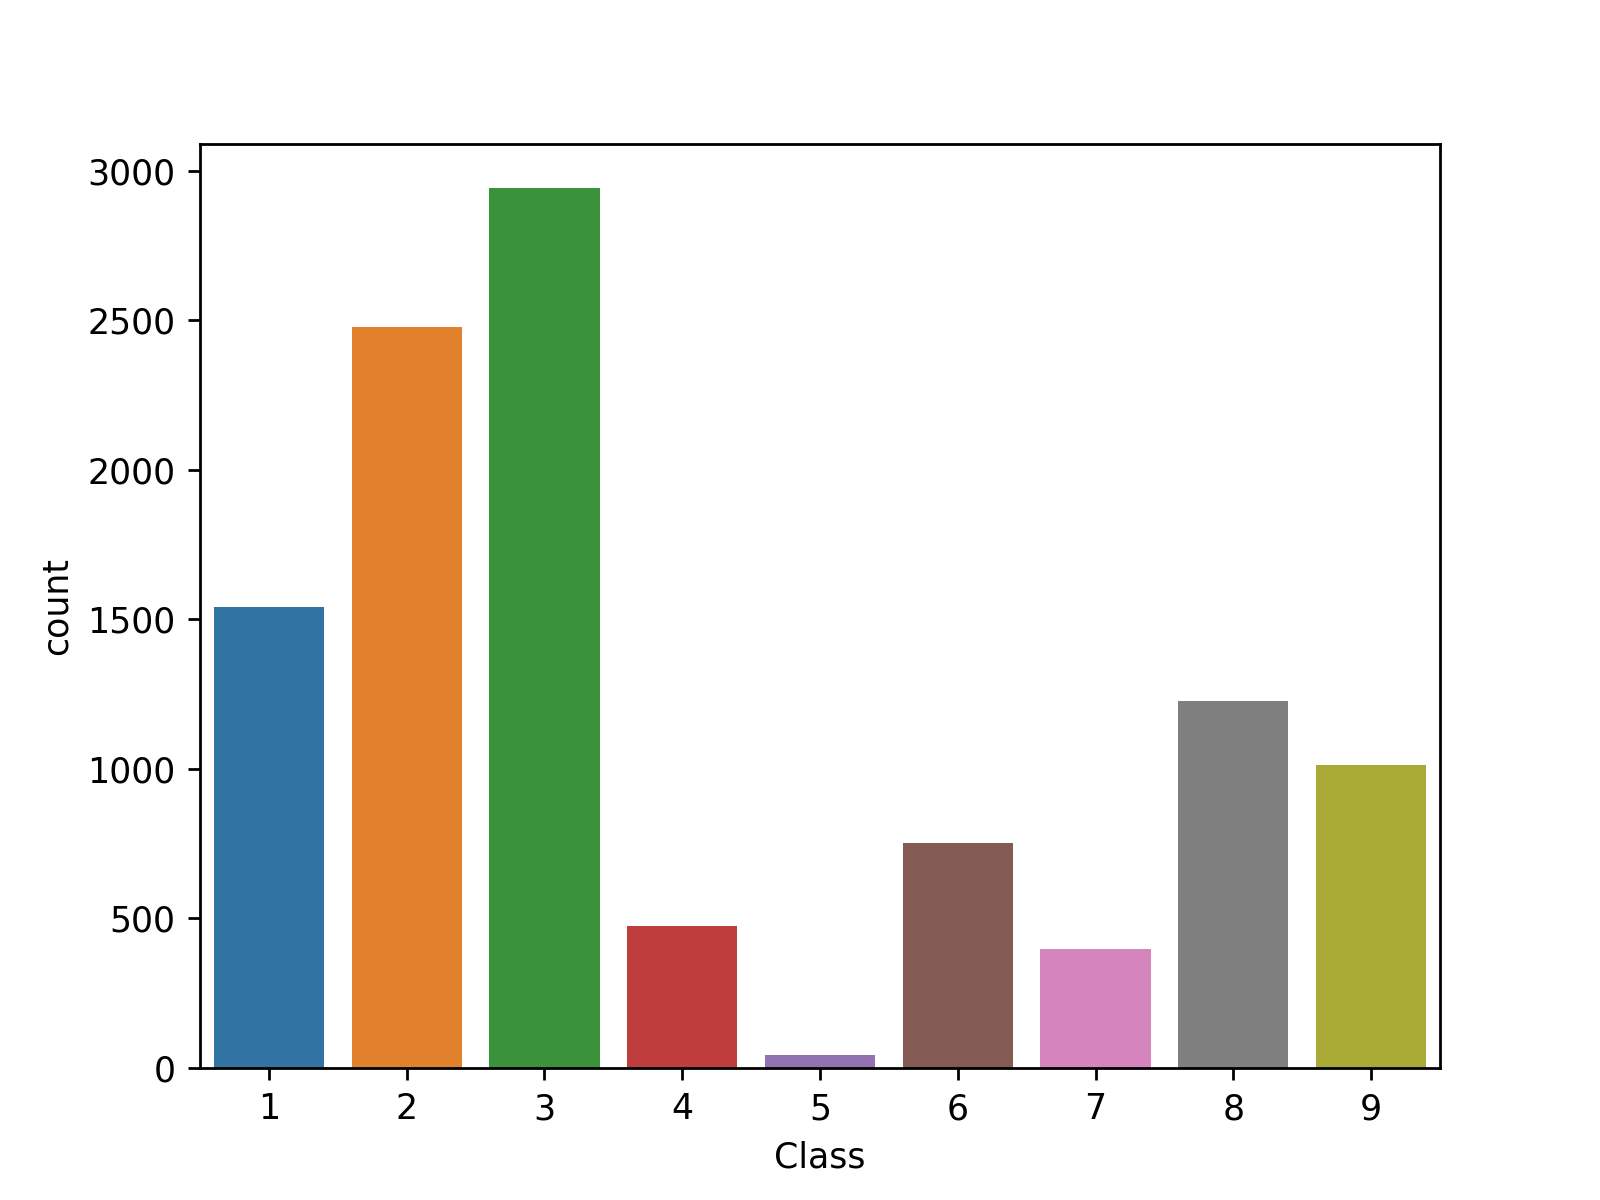

In [14]:
######class counts in dataset################

ax = sns.countplot(x="Class", data=Y)
plt.show()


<IPython.core.display.Javascript object>


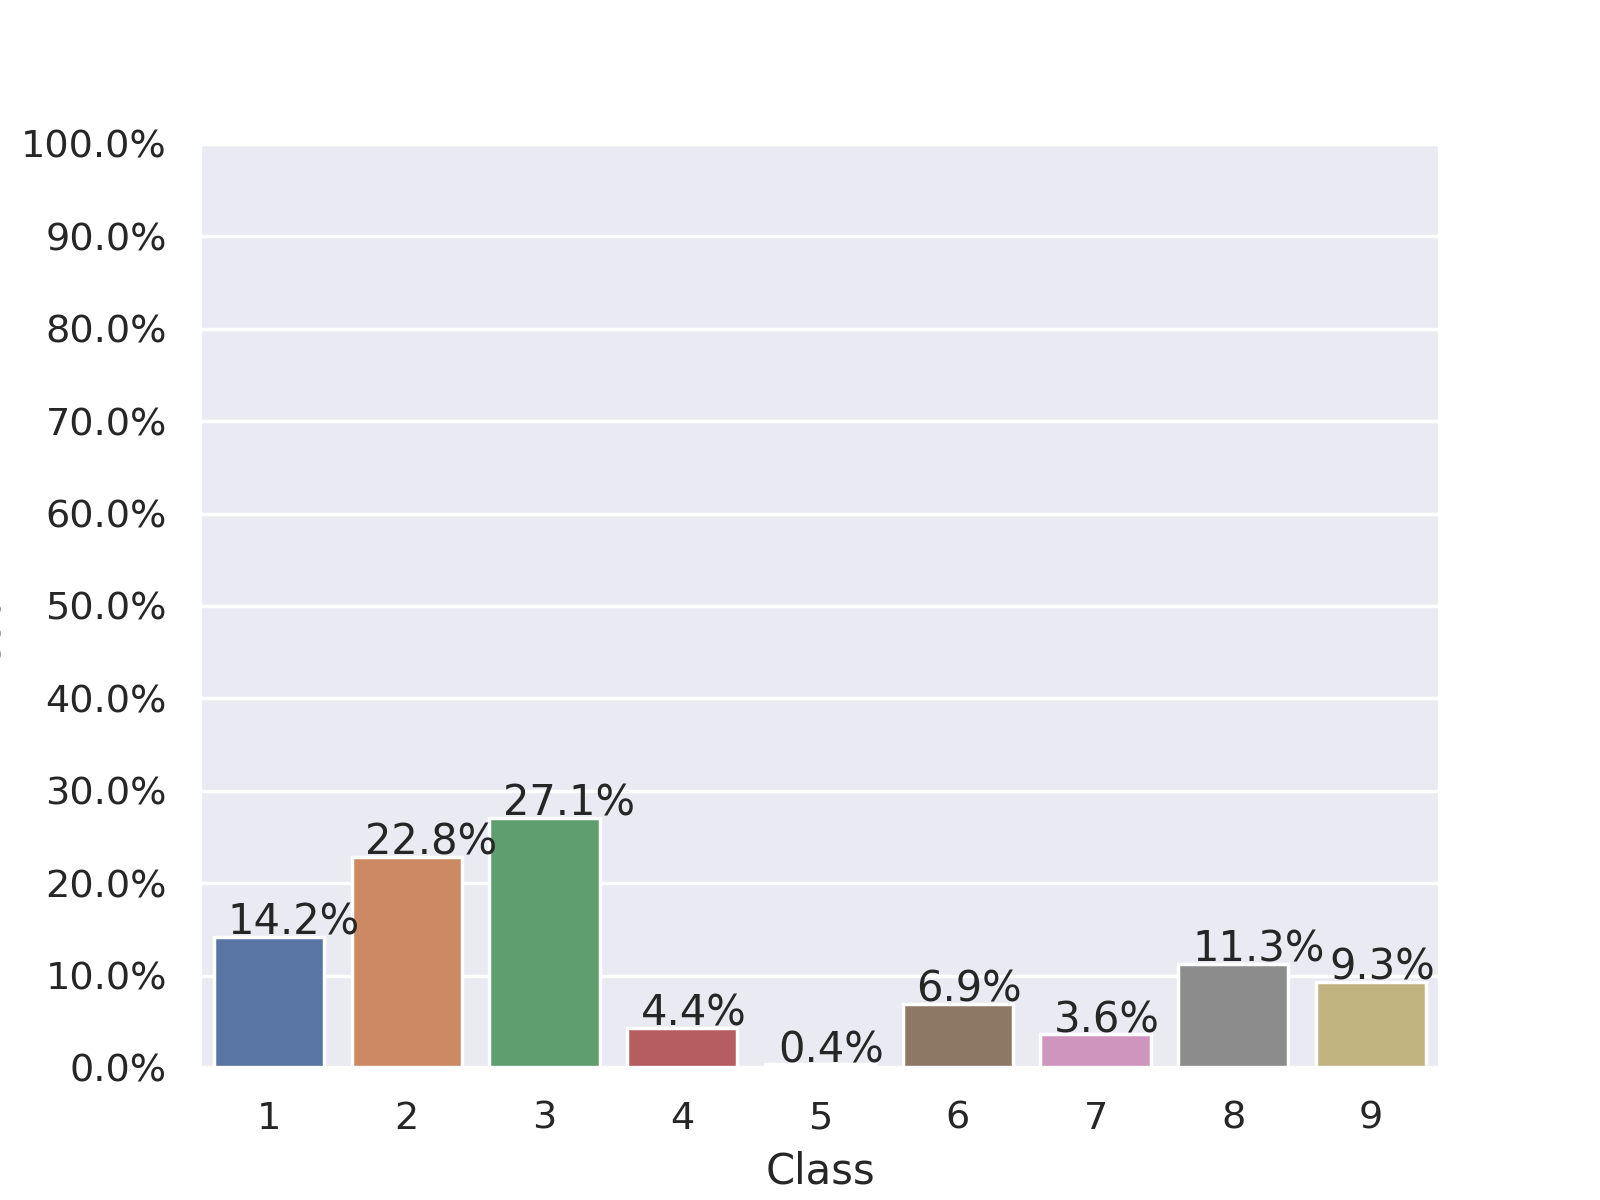

In [39]:
################percentage distribution of classes
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

## Create table id_size

In [4]:

######create table id_size
with create_connection() as conn:
    c=conn.cursor()
    c.execute('CREATE TABLE IF NOT EXISTS id_size(id TEXT QINIQUE PRIMARY KEY,size REAL)')
    for f in Y['Id']:
        s=(os.path.getsize('./byteFiles/'+f+'.bytes'))/(1024*1024) ##convert the size in to  MB
        sm=round(s,2)
        t=(f,sm)
        c.execute("INSERT OR REPLACE INTO id_size VALUES(?,?)",t)
        conn.commit()
   


In [10]:
df1=pd.read_sql_query('SELECT a.Id,a.Class, b.size FROM id_Class a INNER JOIN id_size b ON a.id=b.id',conn)
df1.head()

Id  Class  size
0  01kcPWA9K2BOxQeS5Rju      1  0.68
1  04EjIdbPV5e1XroFOpiN      1  0.85
2  05EeG39MTRrI6VY21DPd      1  0.51
3  05rJTUWYAKNegBk2wE8X      1  2.79
4  0AnoOZDNbPXIr2MRBSCJ      1  0.57

<IPython.core.display.Javascript object>


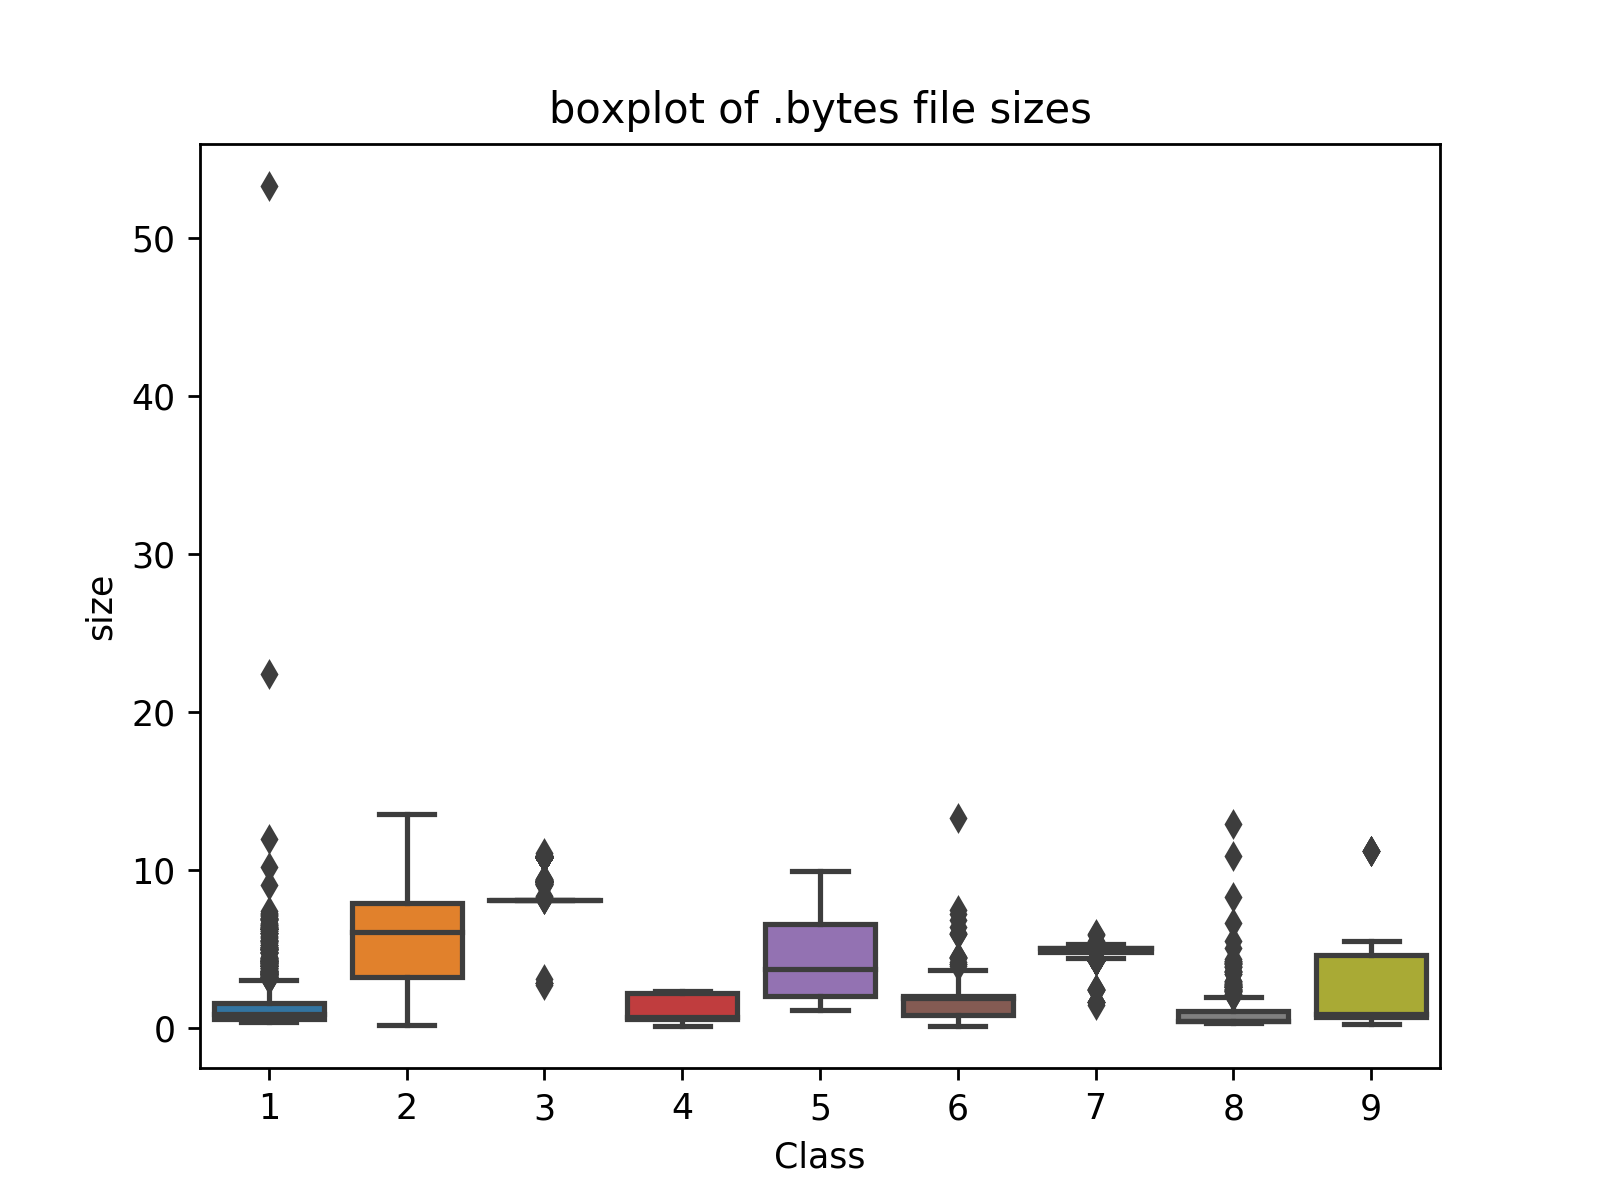

In [15]:
ax = sns.boxplot(x="Class", y="size", data=df1)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [16]:
#######generate names  of all possible 1-grams
h1=[]
a=['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
for i in a:
    for j in a:
        h1.append(i+j)
h1.append("??")     
h2=['"'+k+'"' for k in h1]


## Create table id_ngram

In [17]:
#######creating table of one gram "id_ngram"

with create_connection() as conn:
    c=conn.cursor()
    columns = ", ".join(" {fld} INTEGER ".format(fld=field) for field in h2)
    c.execute("""
        CREATE TABLE IF NOT EXISTS id_ngram(
             Id  TEXT PRIMARY KEY  UNIQUE,
             {cls}
        )
        """.format(cls=columns))
    ####take care of sql injection

In [18]:
def getString(cnt):
    result = '?'
    for i in range(1,cnt):
        result += ', ?'
    return result

## populate table id_ngram using 1-gram technique

In [11]:
%%time

##########Dataset creation== single thread== id_ngram in to database#####################################singlethread##########
for f in tqdm(Y['Id']):
    d={k:0 for k in h1}
    #print(d)
    fh=open('byteFiles/'+f+'.bytes','+r')
    for line in fh:
        #print(line.split())
        #d1={k:int(d[i])+1 for i in line.split() if len(i)==2}
        for i in line.split():
            if len(i)==2:  ####skip the address
               #print(i)
                d[i]=int(d[i])+1
                #record=[f] + d.values
    t=tuple([f]+list(d.values()))
    exe = 'INSERT OR REPLACE INTO id_ngram VALUES ('+getString(258)+')'
    c.execute(exe, t)
    
    #print(d)
    
#fh.close()
#conn.commit()
#conn.close()

100%|██████████| 10868/10868 [1:48:46<00:00,  3.48it/s] 

CPU times: user 1h 46min 46s, sys: 40.1 s, total: 1h 47min 26s
Wall time: 1h 48min 46s


In [19]:
#######sample of id_ngram
df=pd.read_sql_query("SELECT * FROM id_ngram",conn)
print(df.shape)
df.head()

(10868, 258)


Id      00     01    02    03     04    05    06    07  \
0  7aEbXfVnzhG6dRMLT58q   29450   1559  1235  1430   1270   908  1014  1000   
1  7DIjuLVbOBykxWXT6ciw  162059  43888  4322  4088  10791  7421  2940  2186   
2  8eiOKmj1ER6wzul0bpT5   53354   4177  2983  2855   5461  2490  2875  1573   
3  8LiHPj7EOaFpnN0uTAW9   35317   1175   686   785    829   444   457   534   
4  8nc3AGwk7qMWrEJhdSxP   46002   3065  1695  2459   2527  1174   971  1037   

      08  ...    F7    F8    F9    FA    FB    FC    FD    FE     FF     ??  
0   1266  ...   970  1089   860   743   823  1193   710   859   6537  90216  
1  10321  ...  1167  1744  1094  1102  1111  1671  1226  1735  20577   4868  
2   4515  ...   863  1561   742   684   778  2673  1916  2596  18540   4532  
3    744  ...   360   486   325   318   332   610   306   510   5304   4356  
4   3156  ...   593  1872   646   595   604  1583   487  1294  10833    320  

[5 rows x 258 columns]

In [13]:
##################################Multithreading####################################
######dont run it ####one time job
#####distribute data to n folders

def move_to_n_folders(n):
    
    for i in range(n):
         if not os.path.isdir(i):
            os.makedirs(str(i))
    for f in Y['Id']:
        r=random.randrange(1,n)
        shutil.copyfile("./byteFiles/"+f+".bytes" , "./"+str(r)+"/"+f+".bytes" ) 

In [16]:
######creation of dataset id_ngram and writing to DB in multiple threads
def create_n_threads(n=0):
    #conn = sqlite3.connect('malware.db',check_same_thread=False)
    with create_connection() as conn:
        c=conn.cursor()
        for f in os.listdir("./"+str(n)):
            d={k:0 for k in h1}
            #print(d)
            fh=open('./'+str(n)+'/'+f,'+r')
            for line in fh:
                #print(line.split())
                #d1={k:int(d[i])+1 for i in line.split() if len(i)==2}
                for i in line.split():
                    if len(i)==2:
                       #print(i)
                        d[i]=int(d[i])+1
                        #record=[f] + d.values

            t=tuple([f.split(".")[0]]+list(d.values()))
            exe = 'INSERT OR REPLACE INTO id_ngram_sample VALUES ('+getString(258)+')'
            c=conn.cursor()
            c.execute(exe, t)
            conn.commit()
            fh.close()


In [12]:
##Multithreading code
# %%time
# n=30 #######number of cores
# t=[None] * n
# for i in range(n):    
#     t[i] = threading.Thread(target=create_n_threads, args=(i,))
#     t[i].start()

# for i in range(n):
#     t[i].join()
# print("completed")  

In [20]:
###########################Multi processing code########################

n=28

if __name__ == "__main__":  # confirms that the code is under main function
    
    procs = []
    
    proc = Process(target=create_n_threads)  # instantiating without any argument
    procs.append(proc)
    proc.start()

    # instantiating process with arguments
    for name in range(1,n):
        # print(name)
        proc = Process(target=create_n_threads, args=(name,))
        procs.append(proc)
        proc.start()

    # complete the processes
    for proc in procs:
        proc.join()

## Merging all three table to create final dataset

In [23]:
######################merging the three tables create final dataset and normalize it
ds=pd.read_sql_query("SELECT a.* , b.size , c.Class FROM id_ngram a INNER JOIN id_size b ON a.Id=b.id INNER JOIN id_Class c ON a.Id=c.id ",conn)
data_y=ds['Class']
ds.head()

Id     00    01    02    03    04    05    06    07  \
0  01kcPWA9K2BOxQeS5Rju  21091  1213   726   817  1257   625   550   523   
1  04EjIdbPV5e1XroFOpiN  40030  1980  1226  1193  1971  1096   961   755   
2  05EeG39MTRrI6VY21DPd  19419   955   693   656   832   463   370   510   
3  05rJTUWYAKNegBk2wE8X  79568  6445  3143  2517  4982  1824  2125  2964   
4  0AnoOZDNbPXIr2MRBSCJ  25791  1202   569   750   948   456   405   517   

     08  ...    F9    FA    FB    FC    FD    FE     FF     ??  size  Class  
0  1078  ...   485   462   516  1133   471   761   7998  13940  0.68      1  
1  2406  ...   479   357   394  1114   507  1080  10826    340  0.85      1  
2   836  ...   354   472   393   384   303   390   2104   8512  0.51      1  
3  8301  ...  1511  1604  2407  5196  4614  4448  47484  44280  2.79      1  
4   754  ...   316   297   343   452   283   401   4532  27384  0.57      1  

[5 rows x 260 columns]

In [24]:
######normalize above table
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('Id') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
ds_n = normalize(ds)

## Normalize the dataset

In [8]:

ds_n.head()

NameError: name 'ds_n' is not defined

## Multivariate analysis using t-sne

<IPython.core.display.Javascript object>


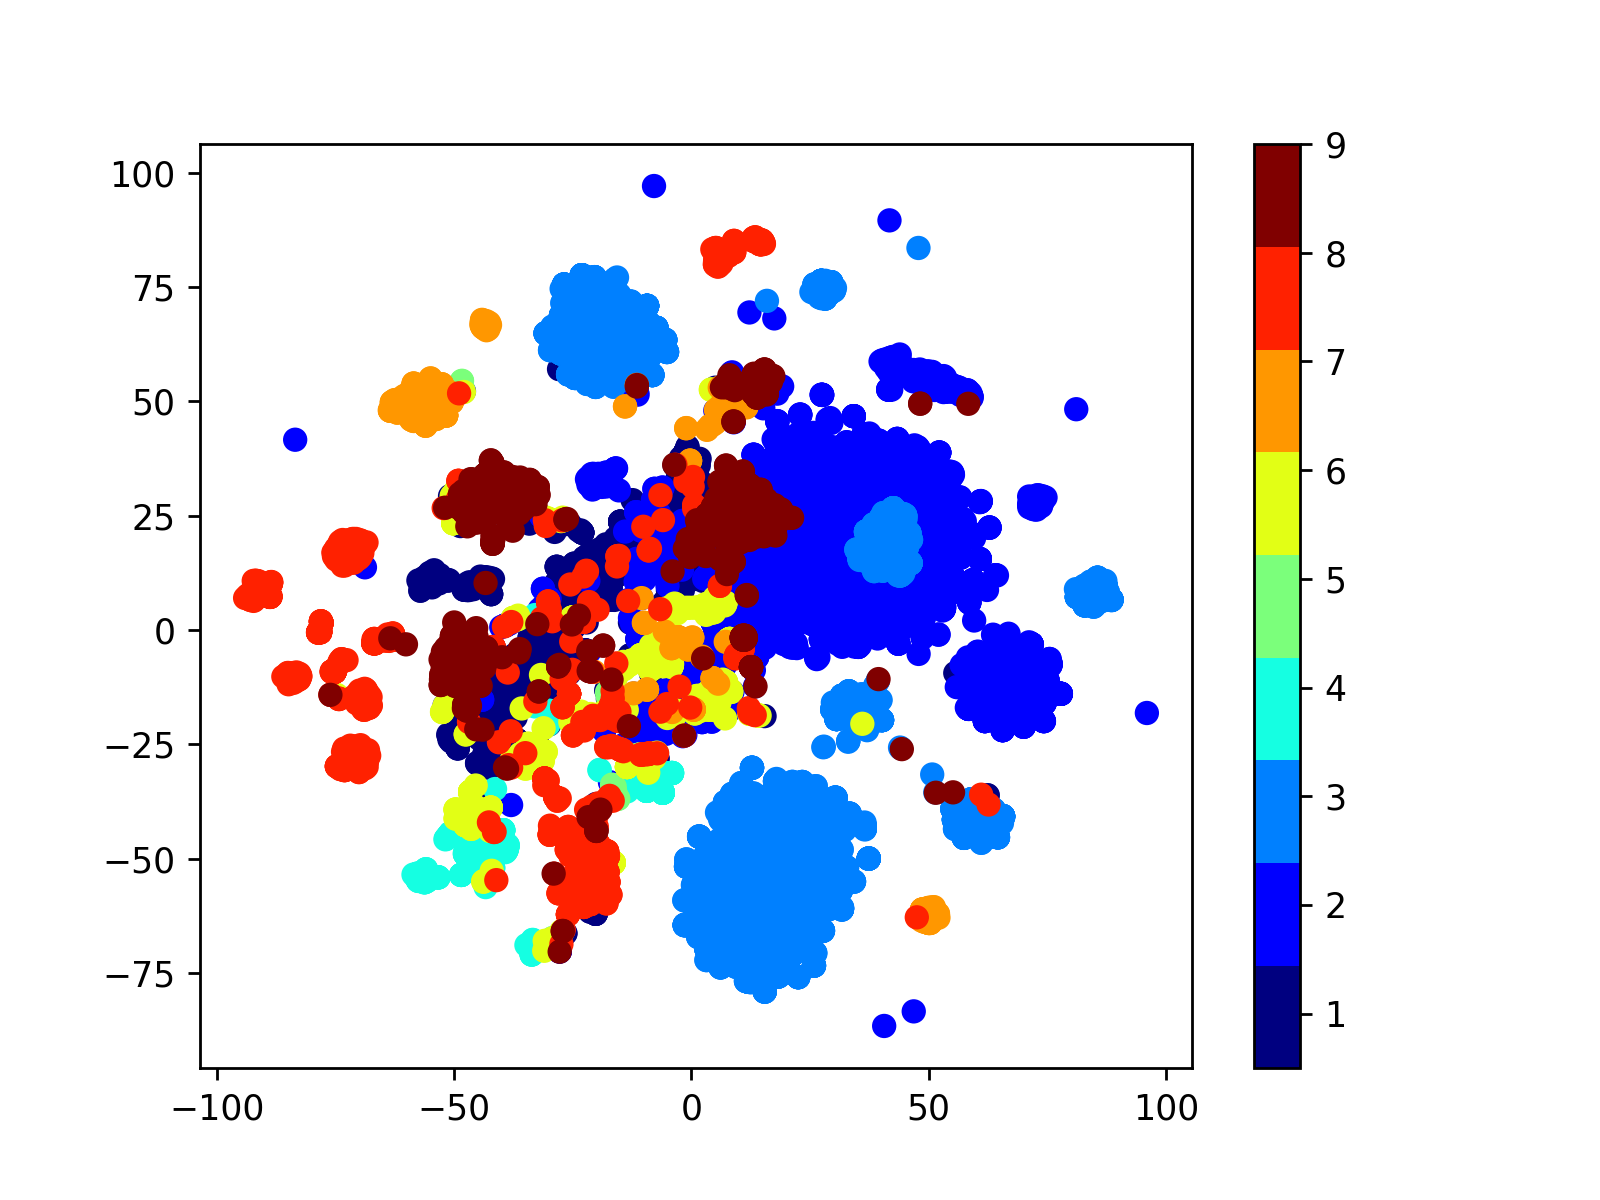

In [26]:
#########Multivariate analysis of datset using T-SNE

xtsne=TSNE(perplexity=50)
dims=xtsne.fit_transform(ds_n.drop(['Id','Class'], axis=1))
vis_x = dims[:, 0] ####first priniciple component
vis_y = dims[:, 1] #####second principle component
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10868 samples in 0.082s...
[t-SNE] Computed neighbors for 10868 samples in 14.987s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10868
[t-SNE] Computed conditional probabilities for sample 2000 / 10868
[t-SNE] Computed conditional probabilities for sample 3000 / 10868
[t-SNE] Computed conditional probabilities for sample 4000 / 10868
[t-SNE] Computed conditional probabilities for sample 5000 / 10868
[t-SNE] Computed conditional probabilities for sample 6000 / 10868
[t-SNE] Computed conditional probabilities for sample 7000 / 10868
[t-SNE] Computed conditional probabilities for sample 8000 / 10868
[t-SNE] Computed conditional probabilities for sample 9000 / 10868
[t-SNE] Computed conditional probabilities for sample 10000 / 10868
[t-SNE] Computed conditional probabilities for sample 10868 / 10868
[t-SNE] Mean sigma: 0.001826
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.824471
[t-SNE] KL

<IPython.core.display.Javascript object>


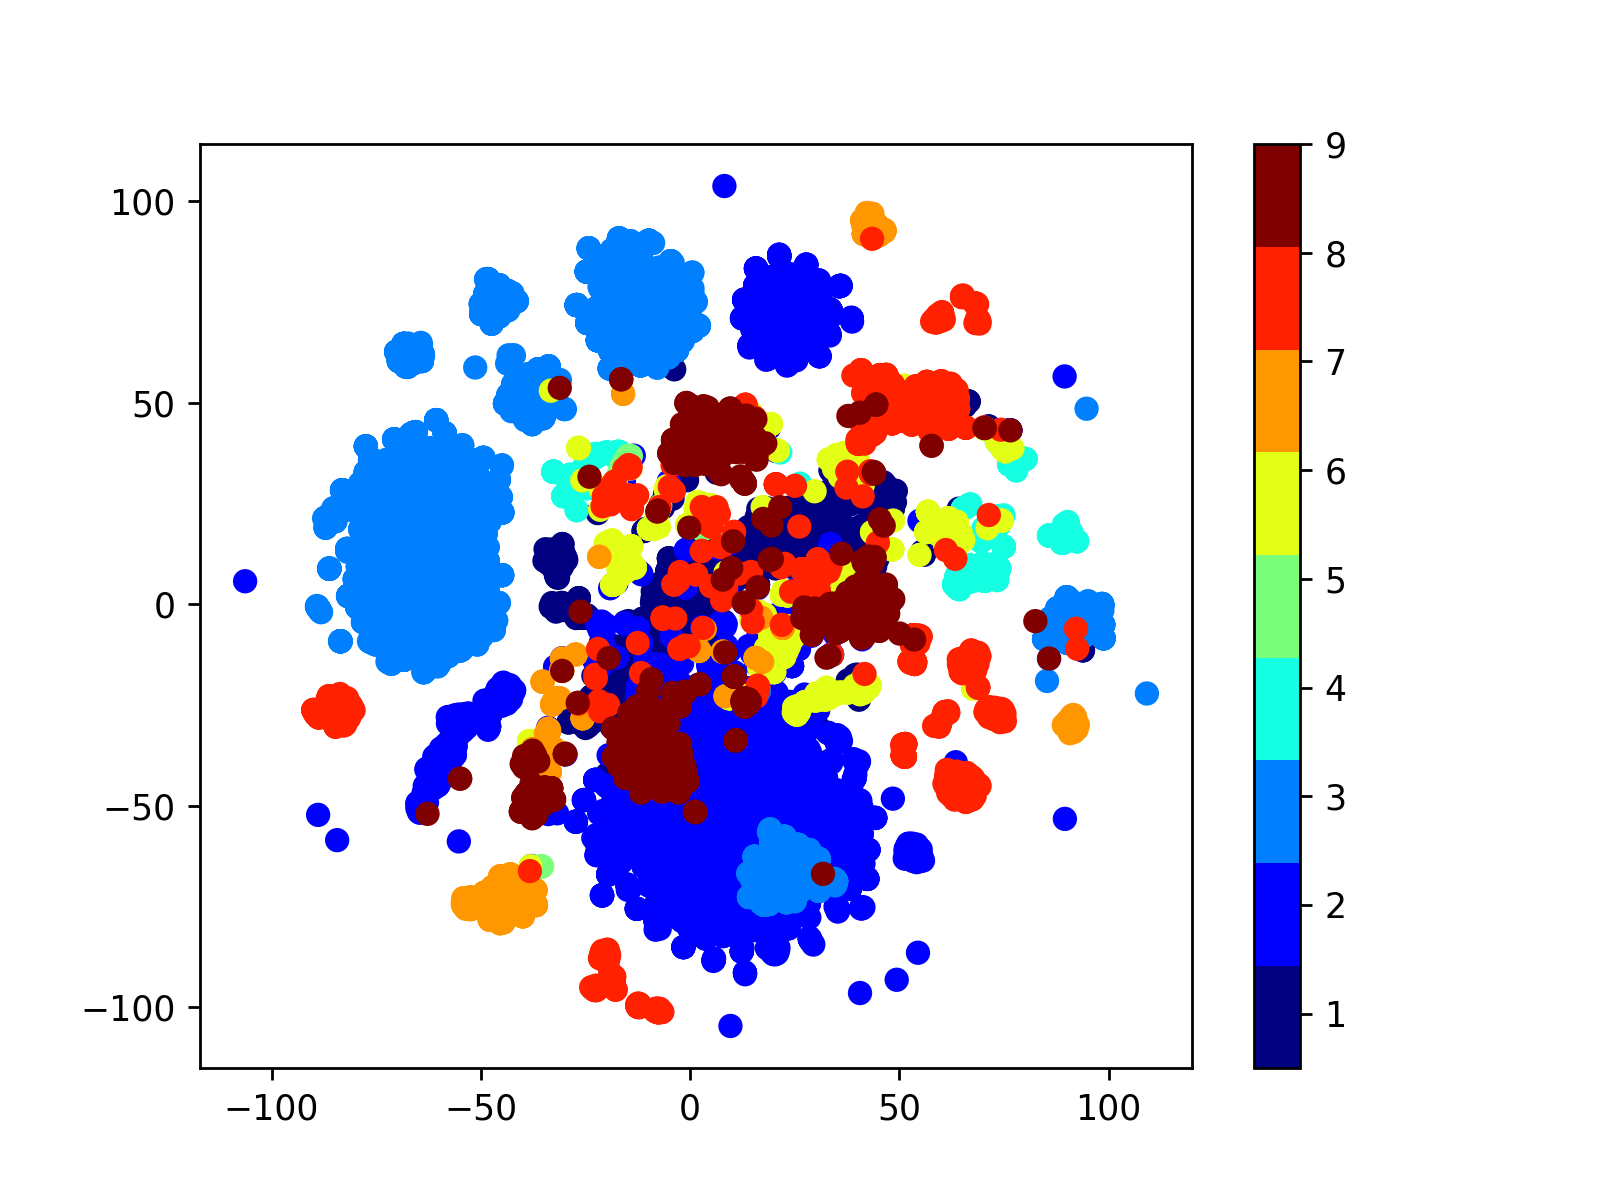

In [27]:
#xtsne=TSNE(perplexity=20)
xtsne = TSNE(n_components=2, verbose=1, perplexity=30)
dims=xtsne.fit_transform(ds_n.drop(['Id','Class'], axis=1))
vis_x = dims[:, 0] ####first priniciple component
vis_y = dims[:, 1] #####second principle component
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


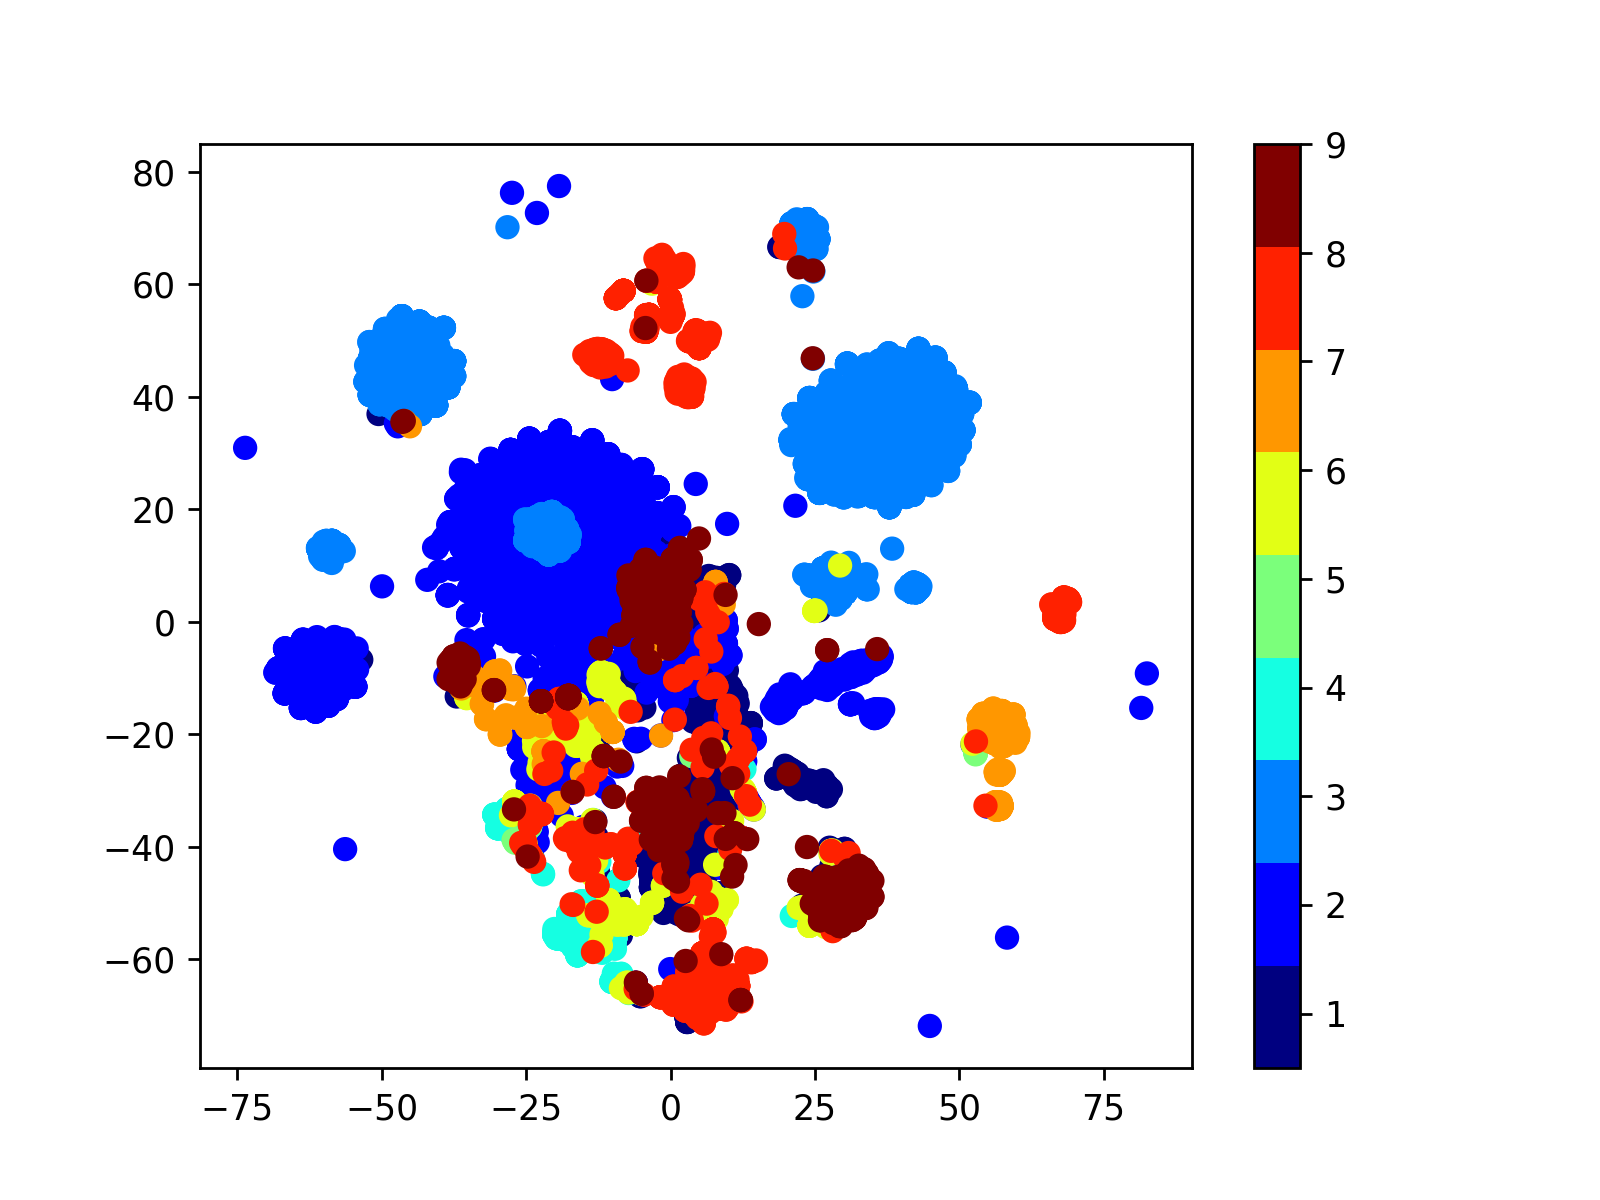

In [28]:
xtsne=TSNE(perplexity=100)
dims=xtsne.fit_transform(ds_n.drop(['Id','Class'], axis=1))
vis_x = dims[:, 0] ####first priniciple component
vis_y = dims[:, 1] #####second principle component
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

## Split the data in to test and train datasets

In [29]:
###############Test Train split
data_y = ds_n['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(ds_n.drop(['Id','Class'], axis=1), data_y,stratify=data_y,test_size=0.25) #stratify maintains same proportion/classis ratio acroos the splits 
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.25)

In [30]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6113
Number of data points in test data: 2717
Number of data points in cross validation data: 2038


## Class distrubution in test and train data sets

<IPython.core.display.Javascript object>


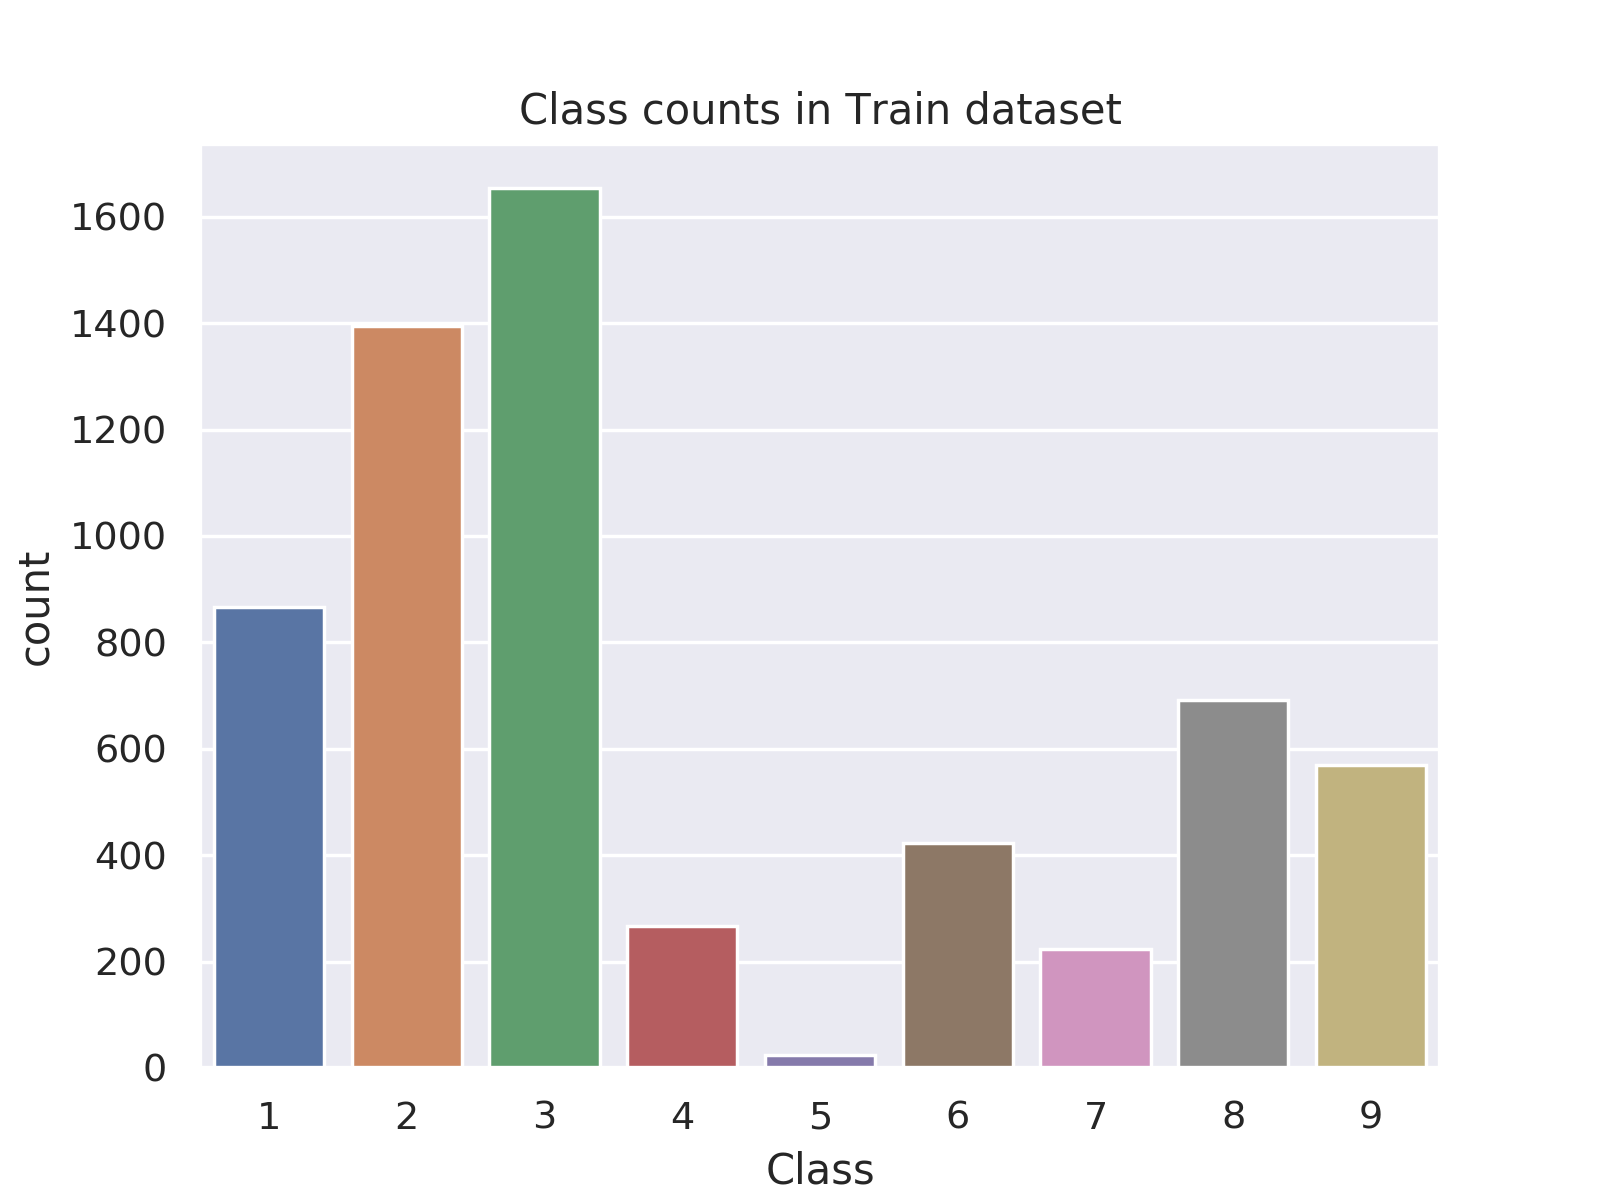

In [31]:
#######distribution of data points in train dataset

df_y_train=pd.DataFrame({'id':y_train.index, 'Class':y_train.values})

sns.set(style="darkgrid")
ax = sns.countplot(x="Class", data=df_y_train)
plt.title('Class counts in Train dataset')
plt.show()

<IPython.core.display.Javascript object>


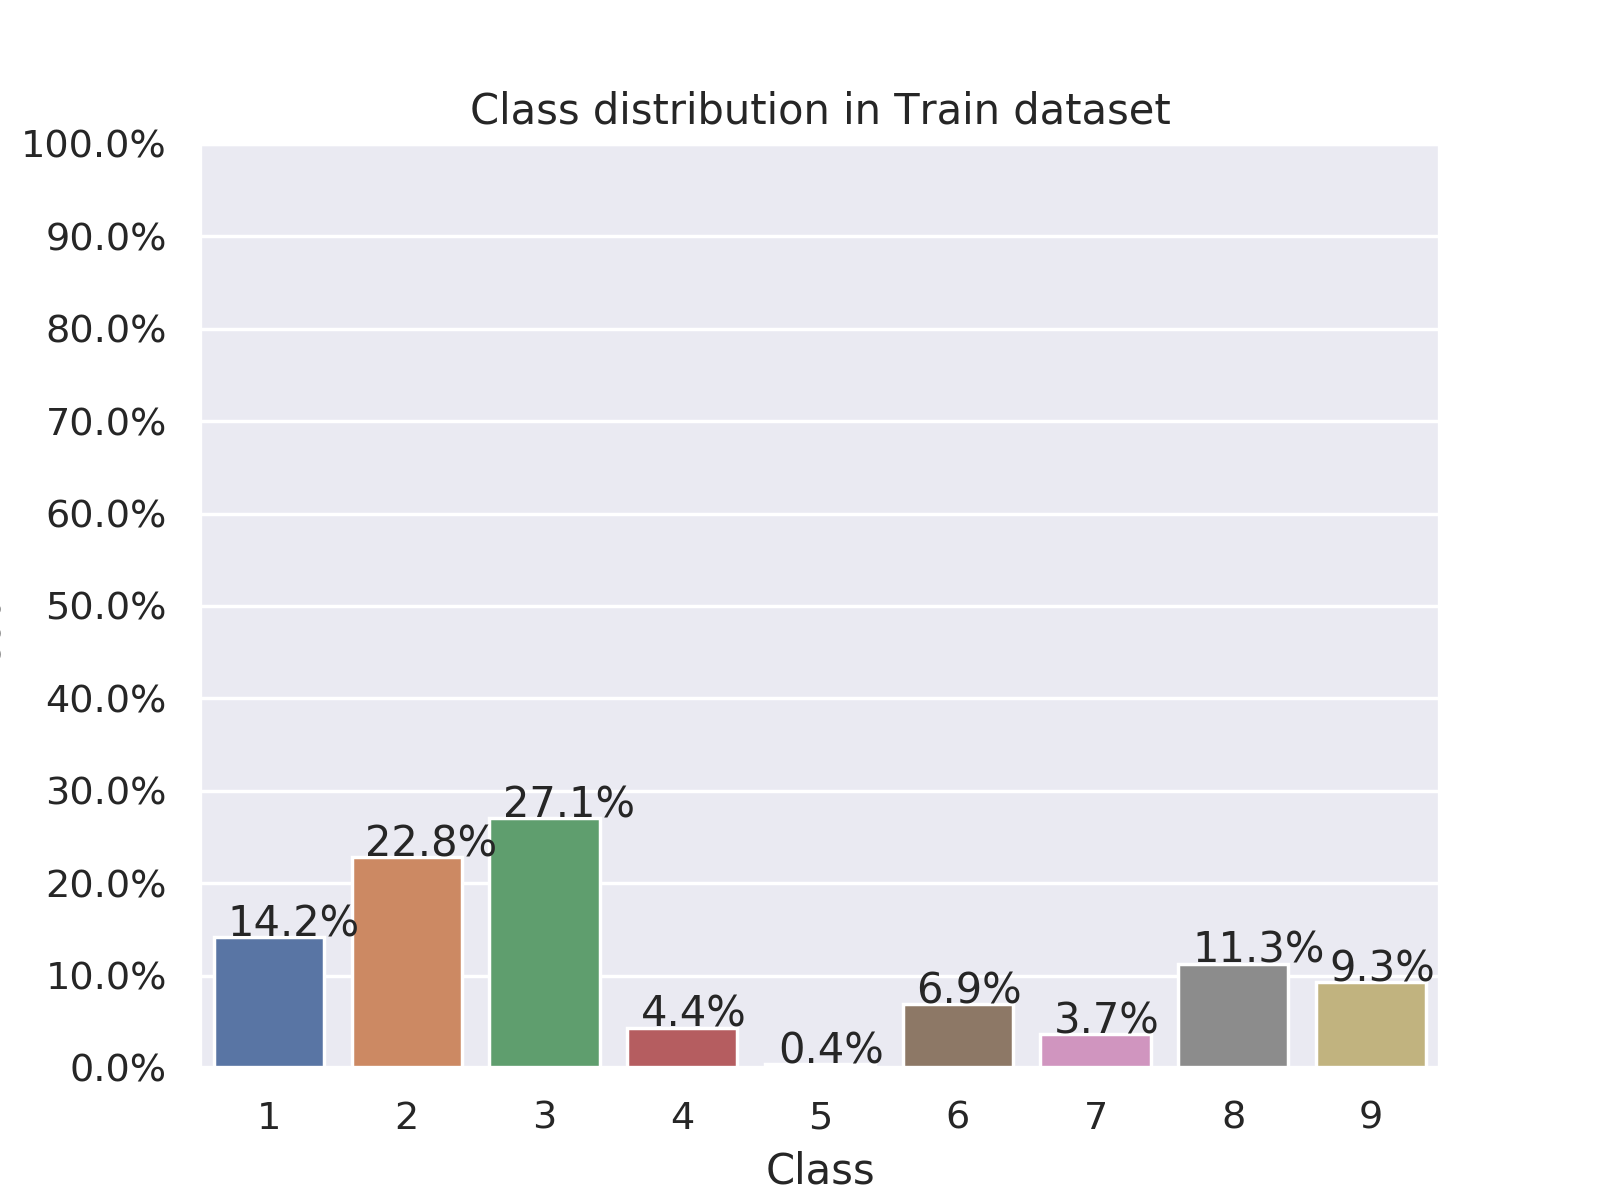

In [32]:
Y=df_y_train
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.title("Class distribution in Train dataset")
plt.show()

<IPython.core.display.Javascript object>


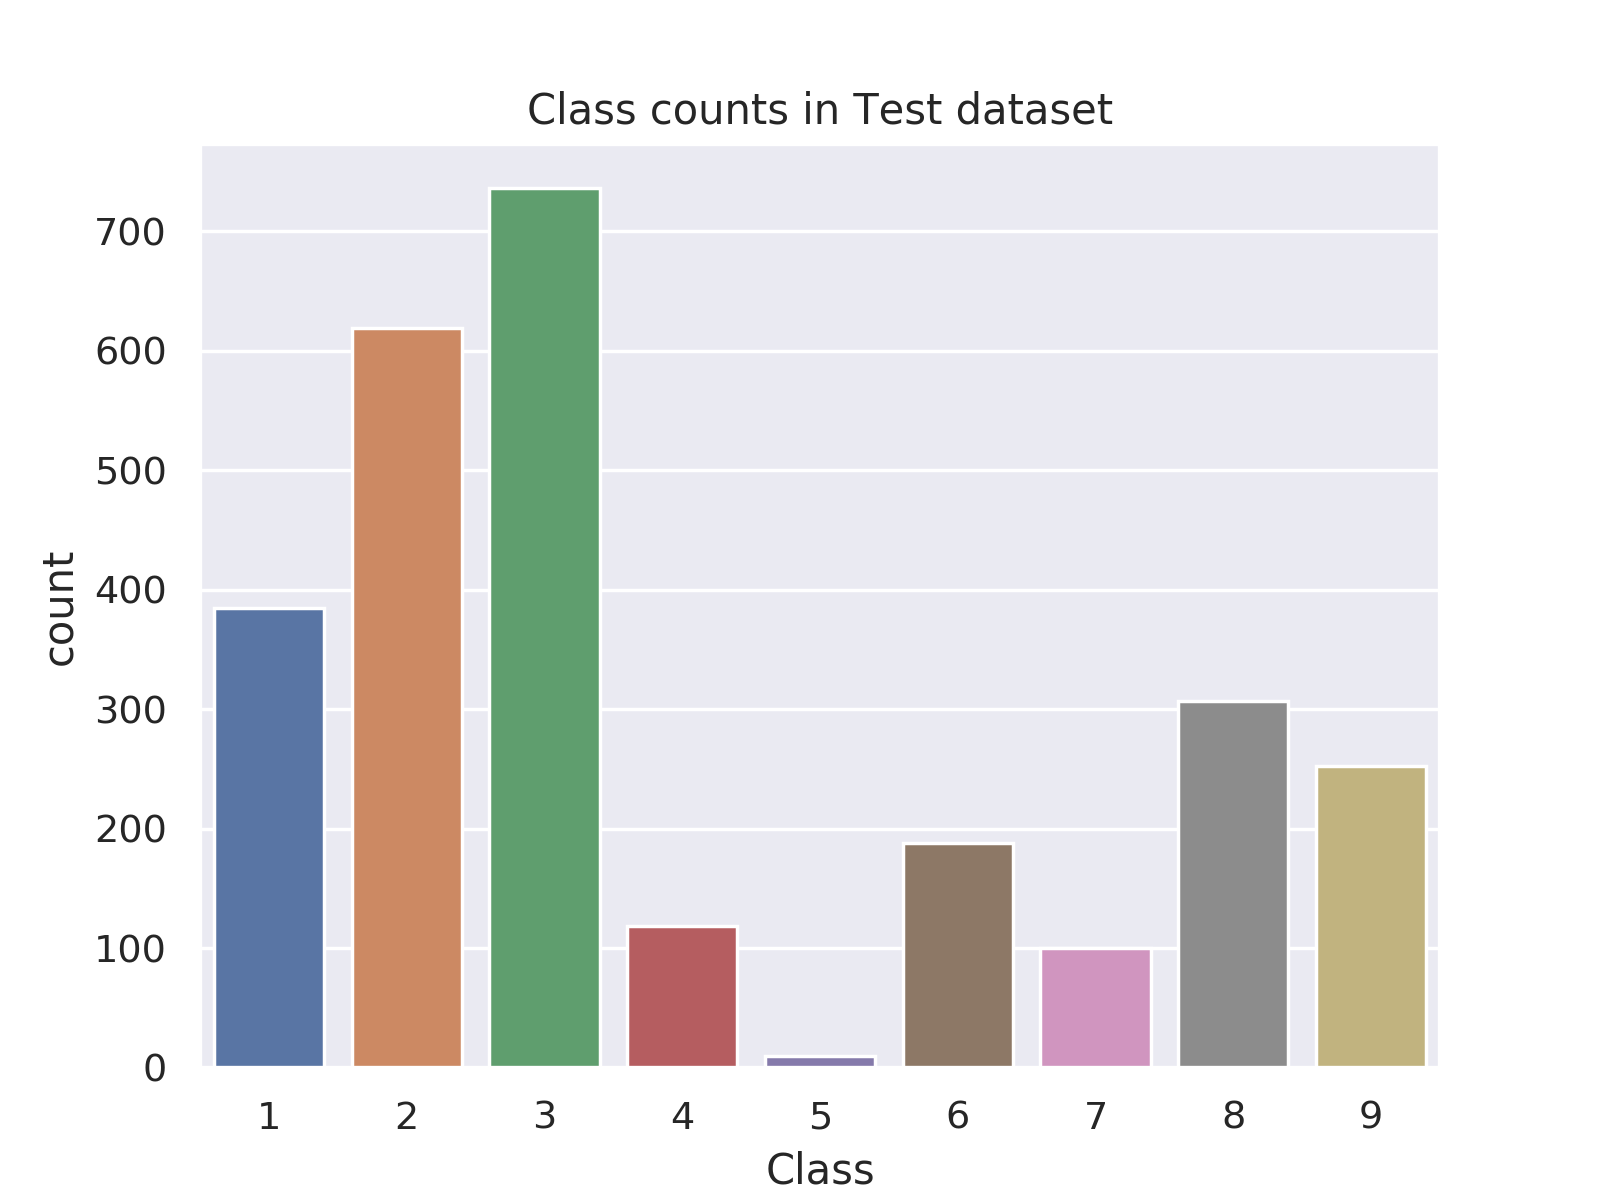

In [33]:
df_y_test=pd.DataFrame({'id':y_test.index, 'Class':y_test.values})

sns.set(style="darkgrid")
ax = sns.countplot(x="Class", data=df_y_test)
plt.title('Class counts in Test dataset')
plt.show()

<IPython.core.display.Javascript object>


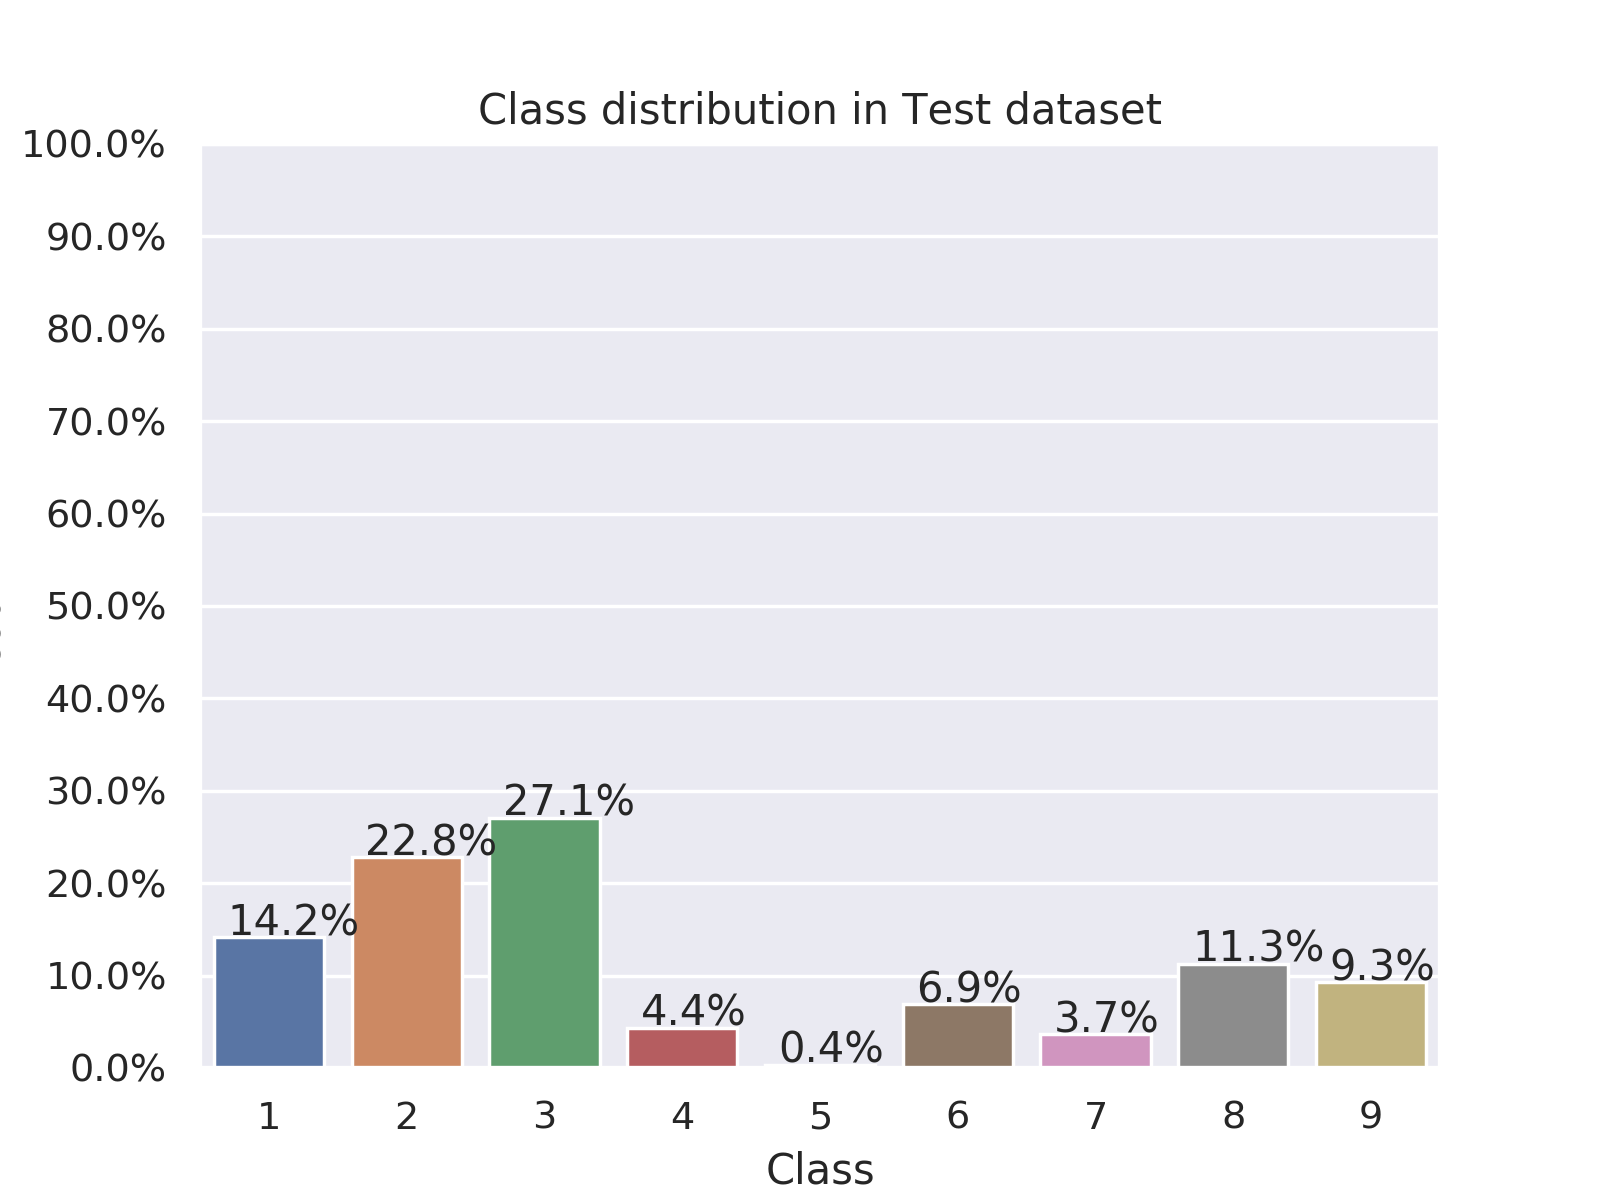

In [34]:
Y=df_y_test
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.title("Class distribution in Test dataset")
plt.show()

<IPython.core.display.Javascript object>


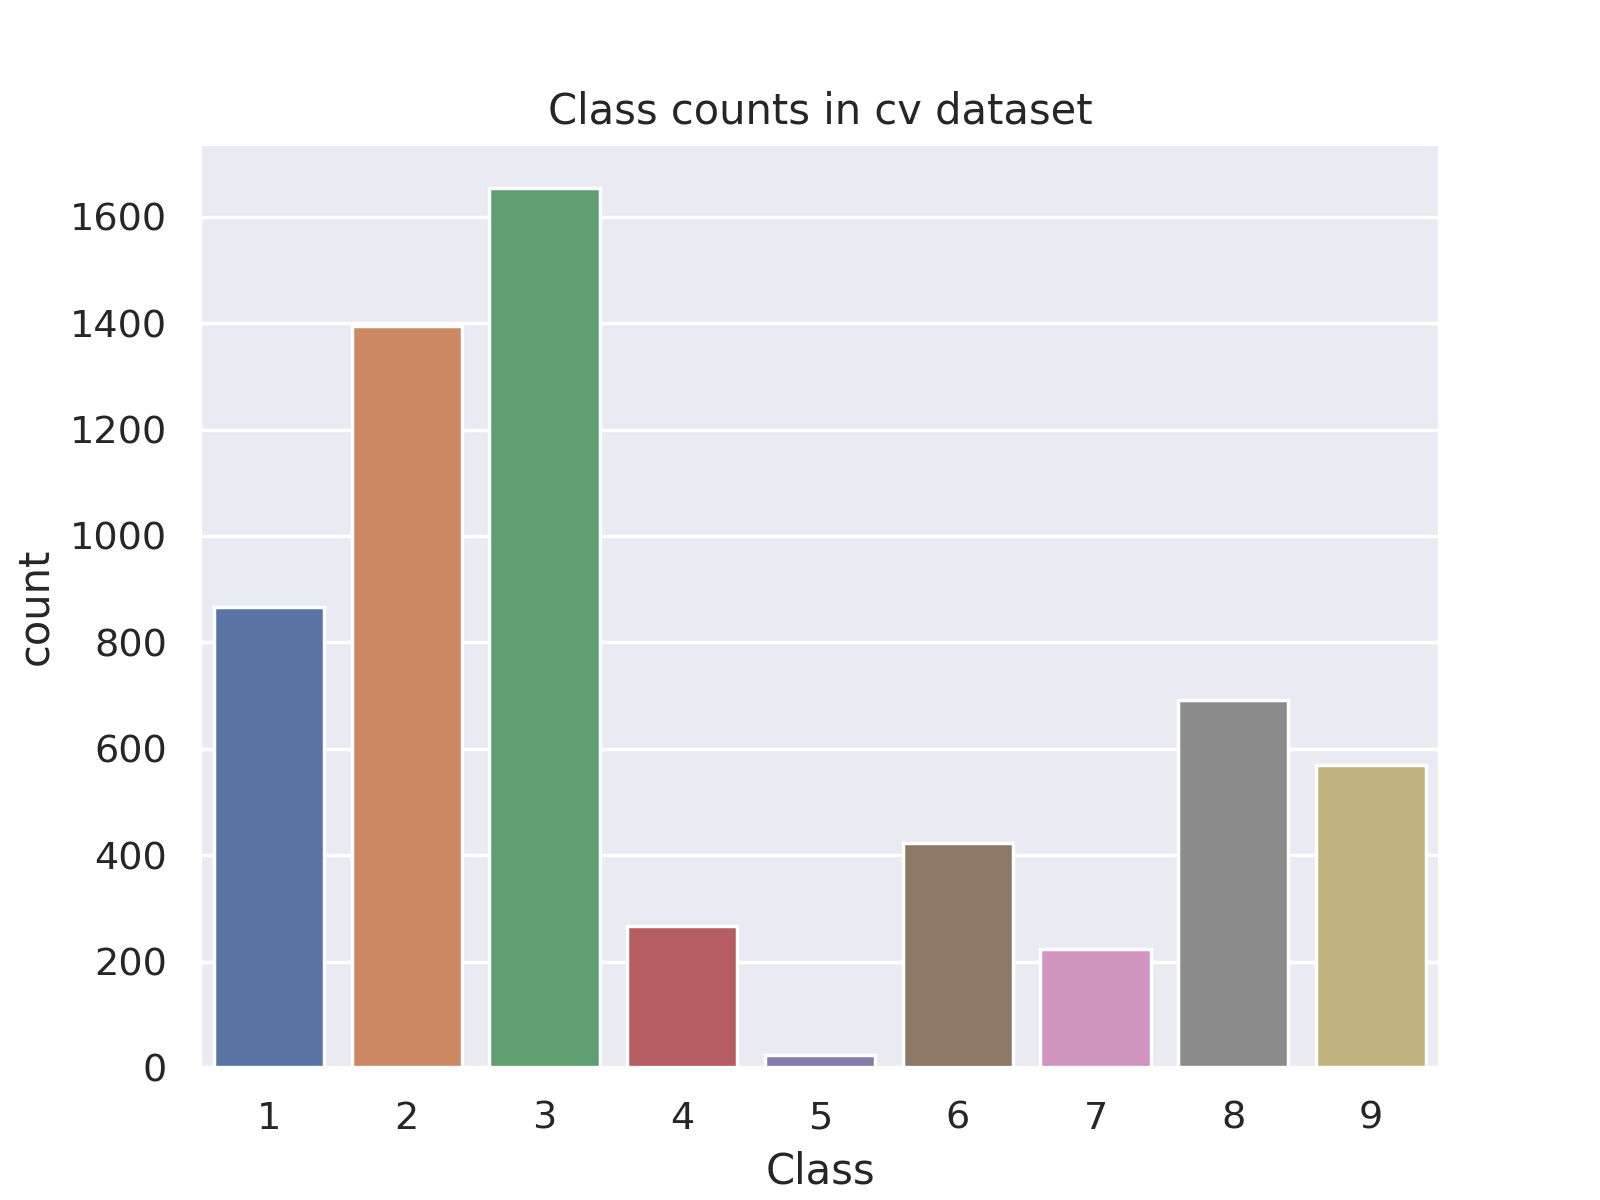

In [35]:
df_y_cv=pd.DataFrame({'id':y_cv.index, 'Class':y_cv.values})

sns.set(style="darkgrid")
ax = sns.countplot(x="Class", data=df_y_train)
plt.title('Class counts in cv dataset')
plt.show()

<IPython.core.display.Javascript object>


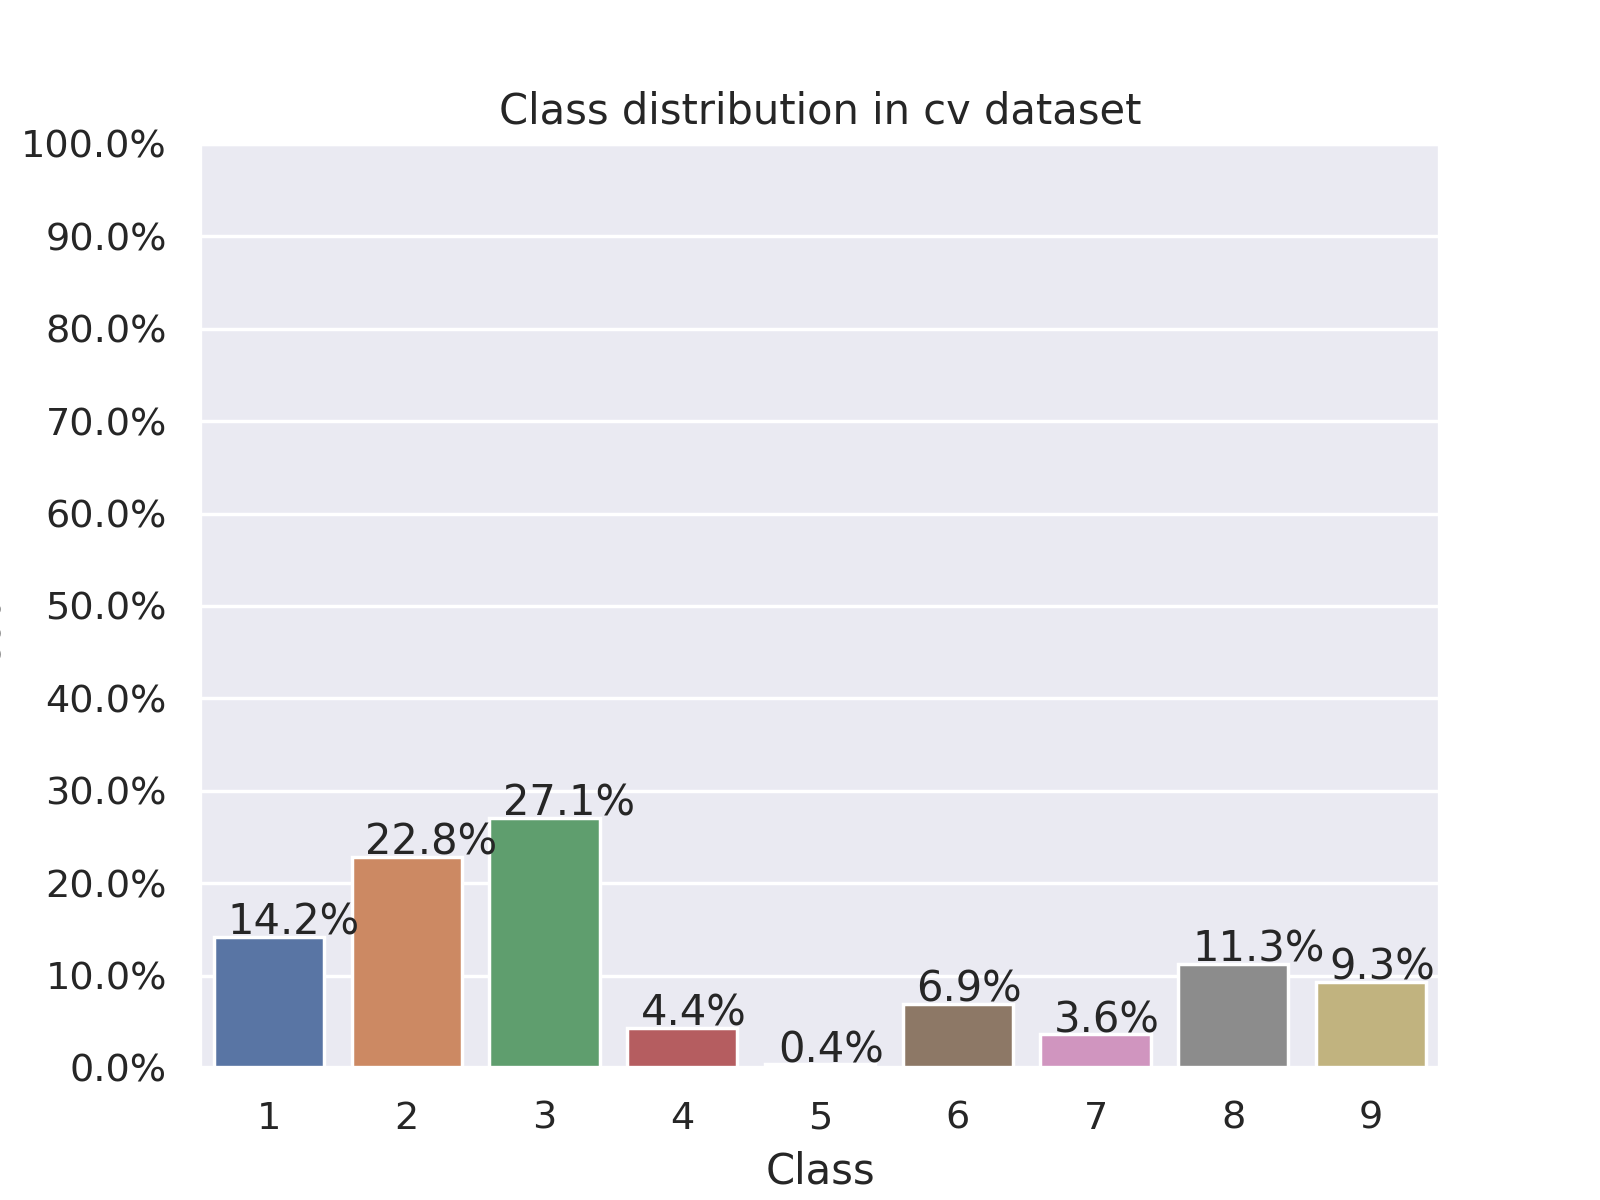

In [36]:
Y=df_y_cv
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.title("Class distribution in cv dataset")
plt.show()

## ML Models

In [37]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("blue")
    # representing A in heatmap format
    print("="*50, "Confusion matrix", "="*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

log_loss for k =  1 is 0.2517806945000695
log_loss for k =  3 is 0.25078440026412163
log_loss for k =  5 is 0.2727328702518313
log_loss for k =  7 is 0.28262517757156497
log_loss for k =  9 is 0.2968311002693958
log_loss for k =  11 is 0.3093337090502582
log_loss for k =  13 is 0.3221529085529926


<IPython.core.display.Javascript object>


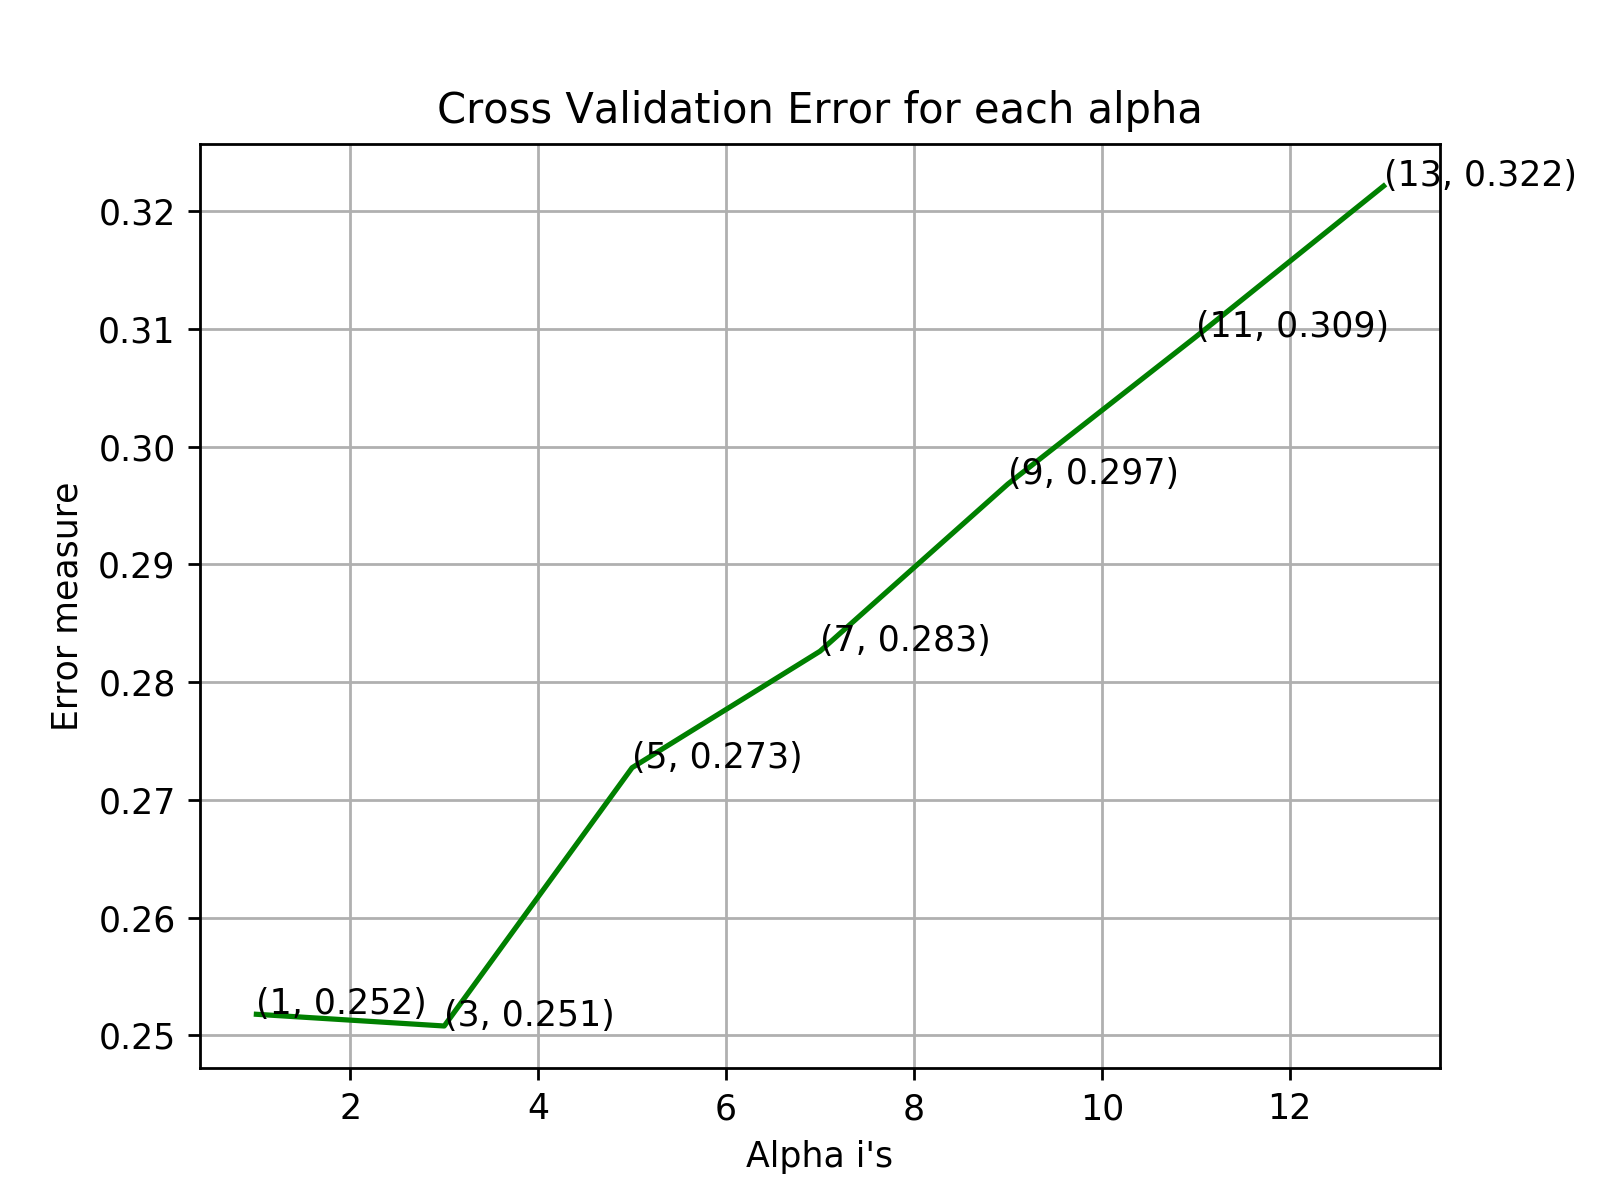

For values of best alpha =  3 The train log loss is: 0.12300946948339461
For values of best alpha =  3 The cross validation log loss is: 0.25078440026412163
For values of best alpha =  3 The test log loss is: 0.23045173185611803
Number of misclassified points  5.520794994479205
================================================== Confusion matrix ==================================================


<IPython.core.display.Javascript object>


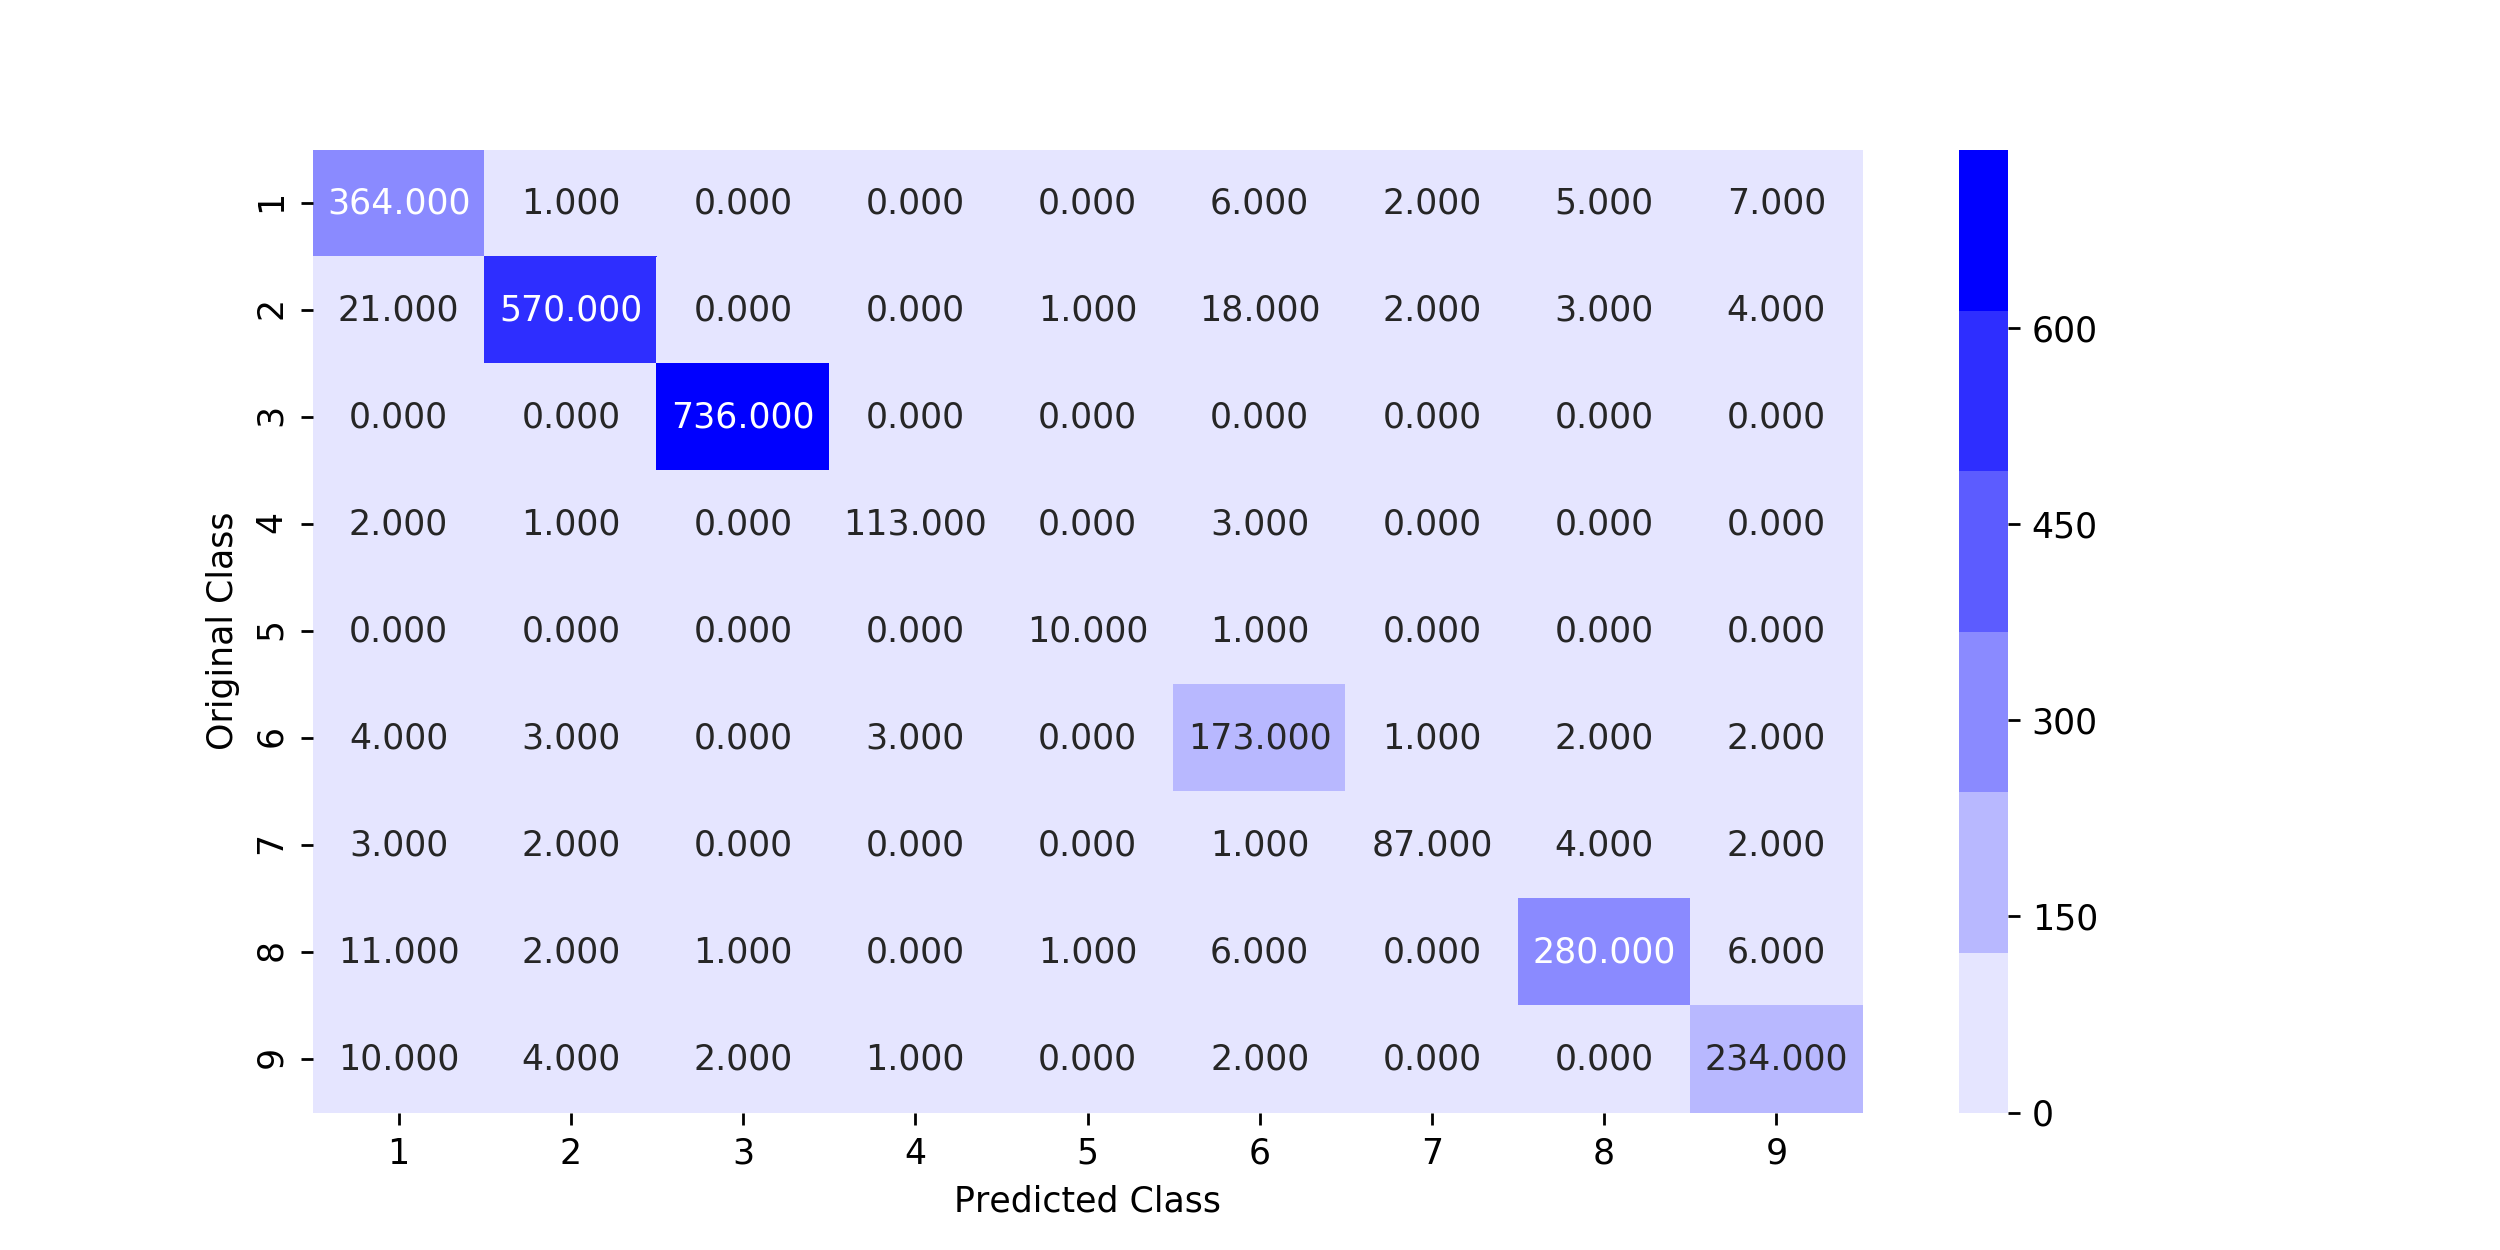

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


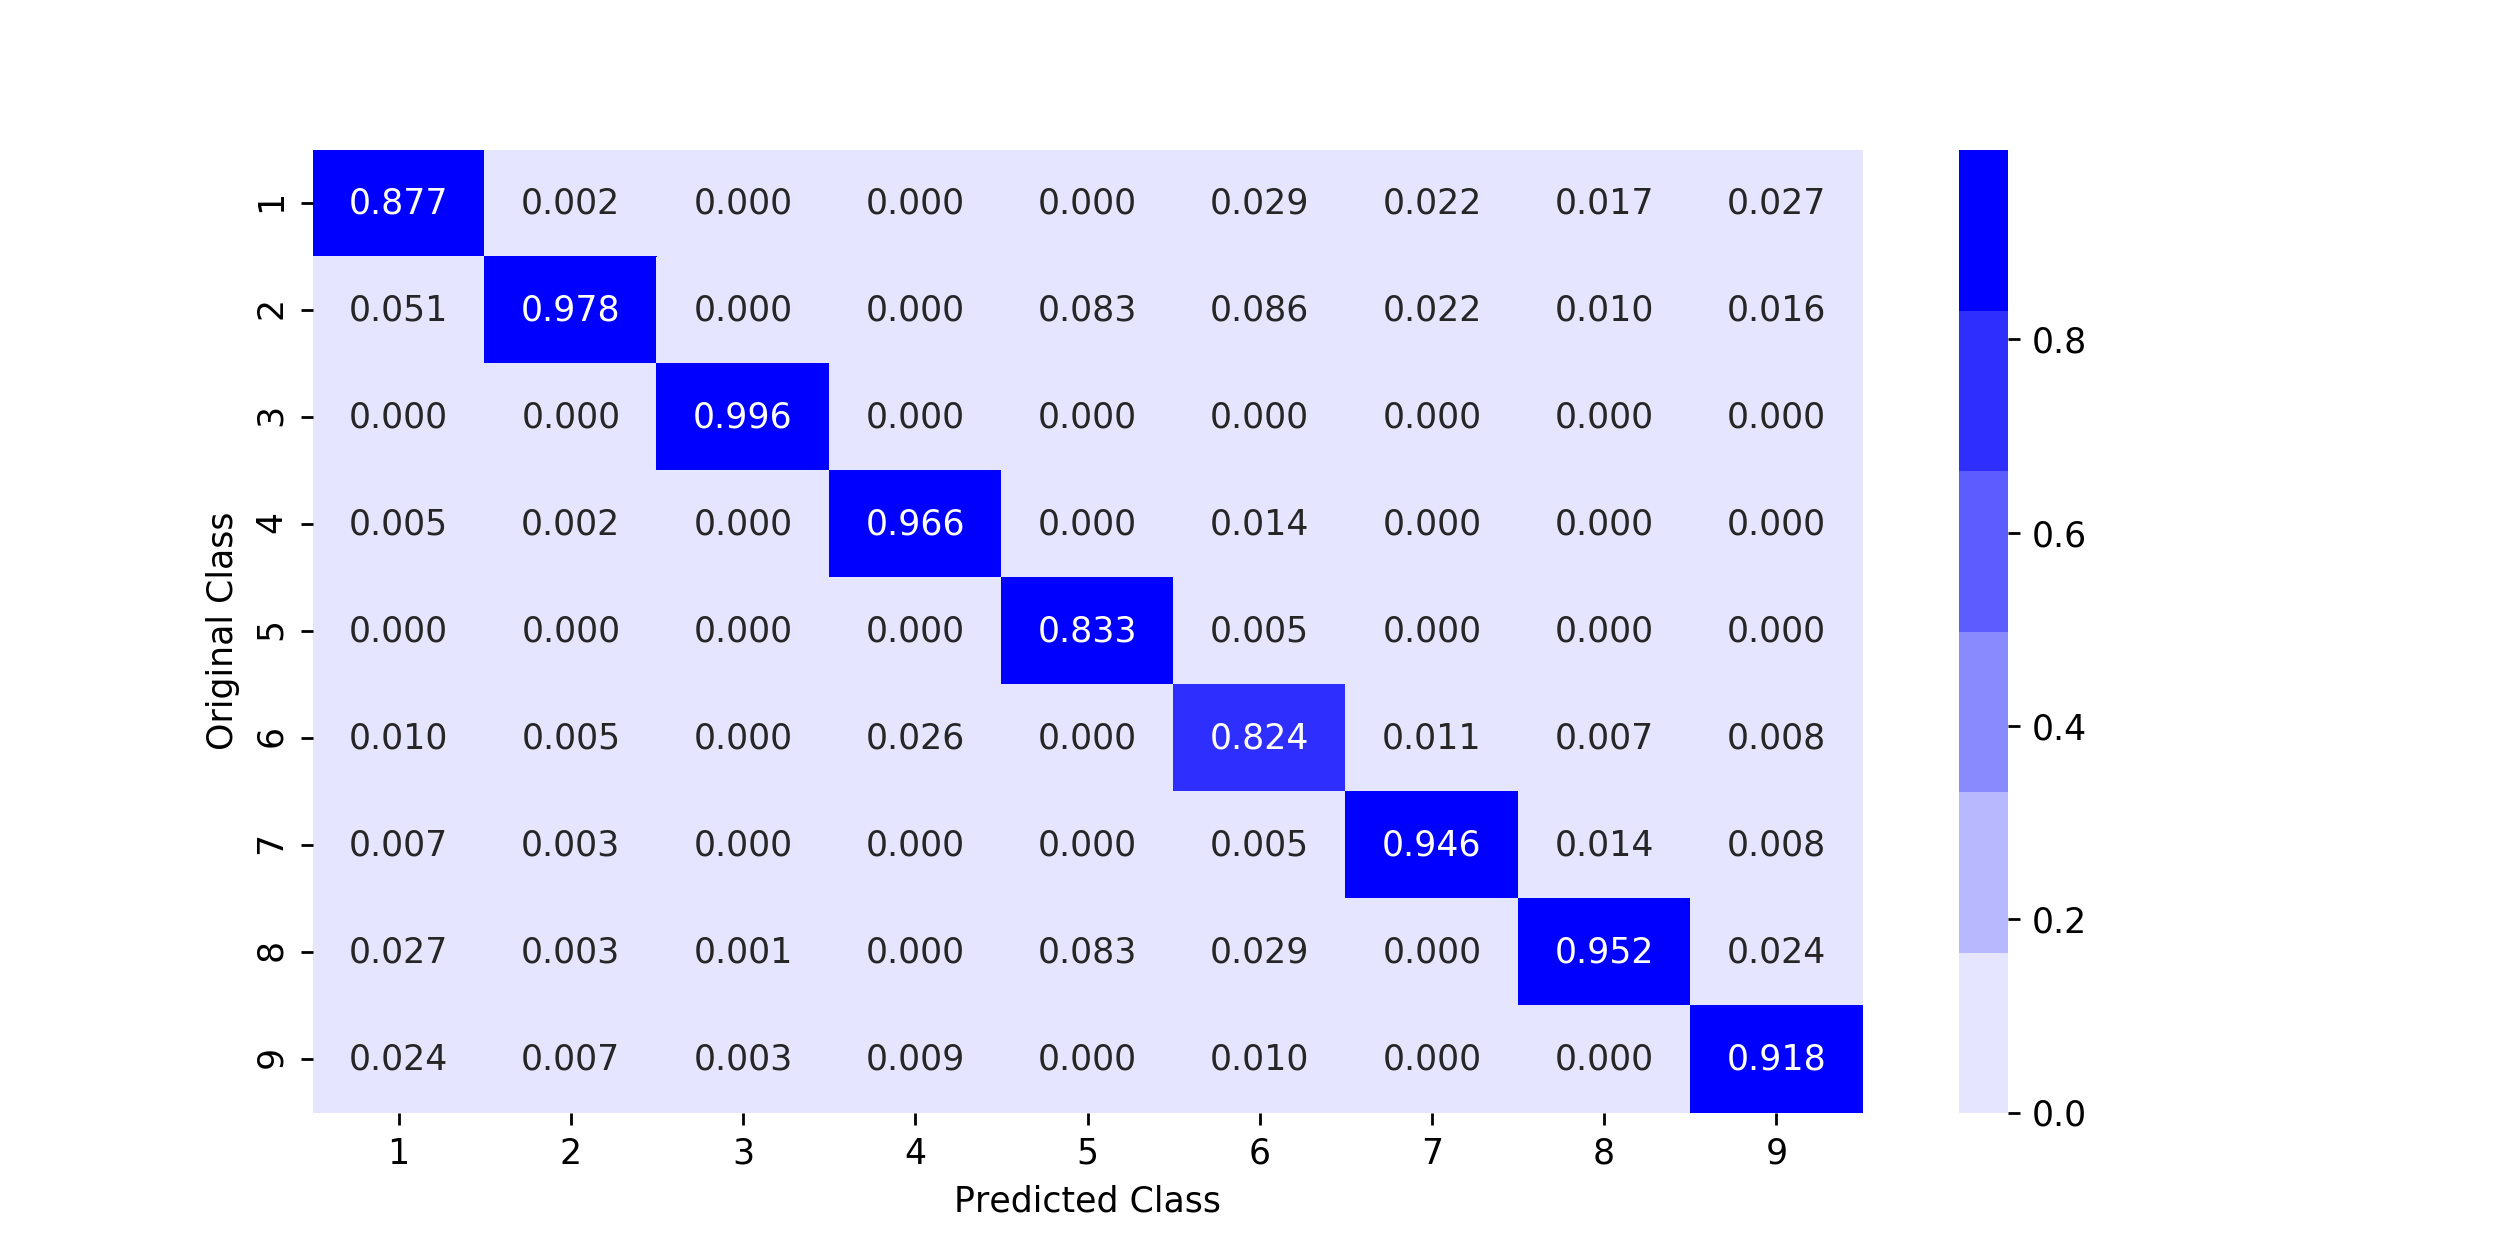

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


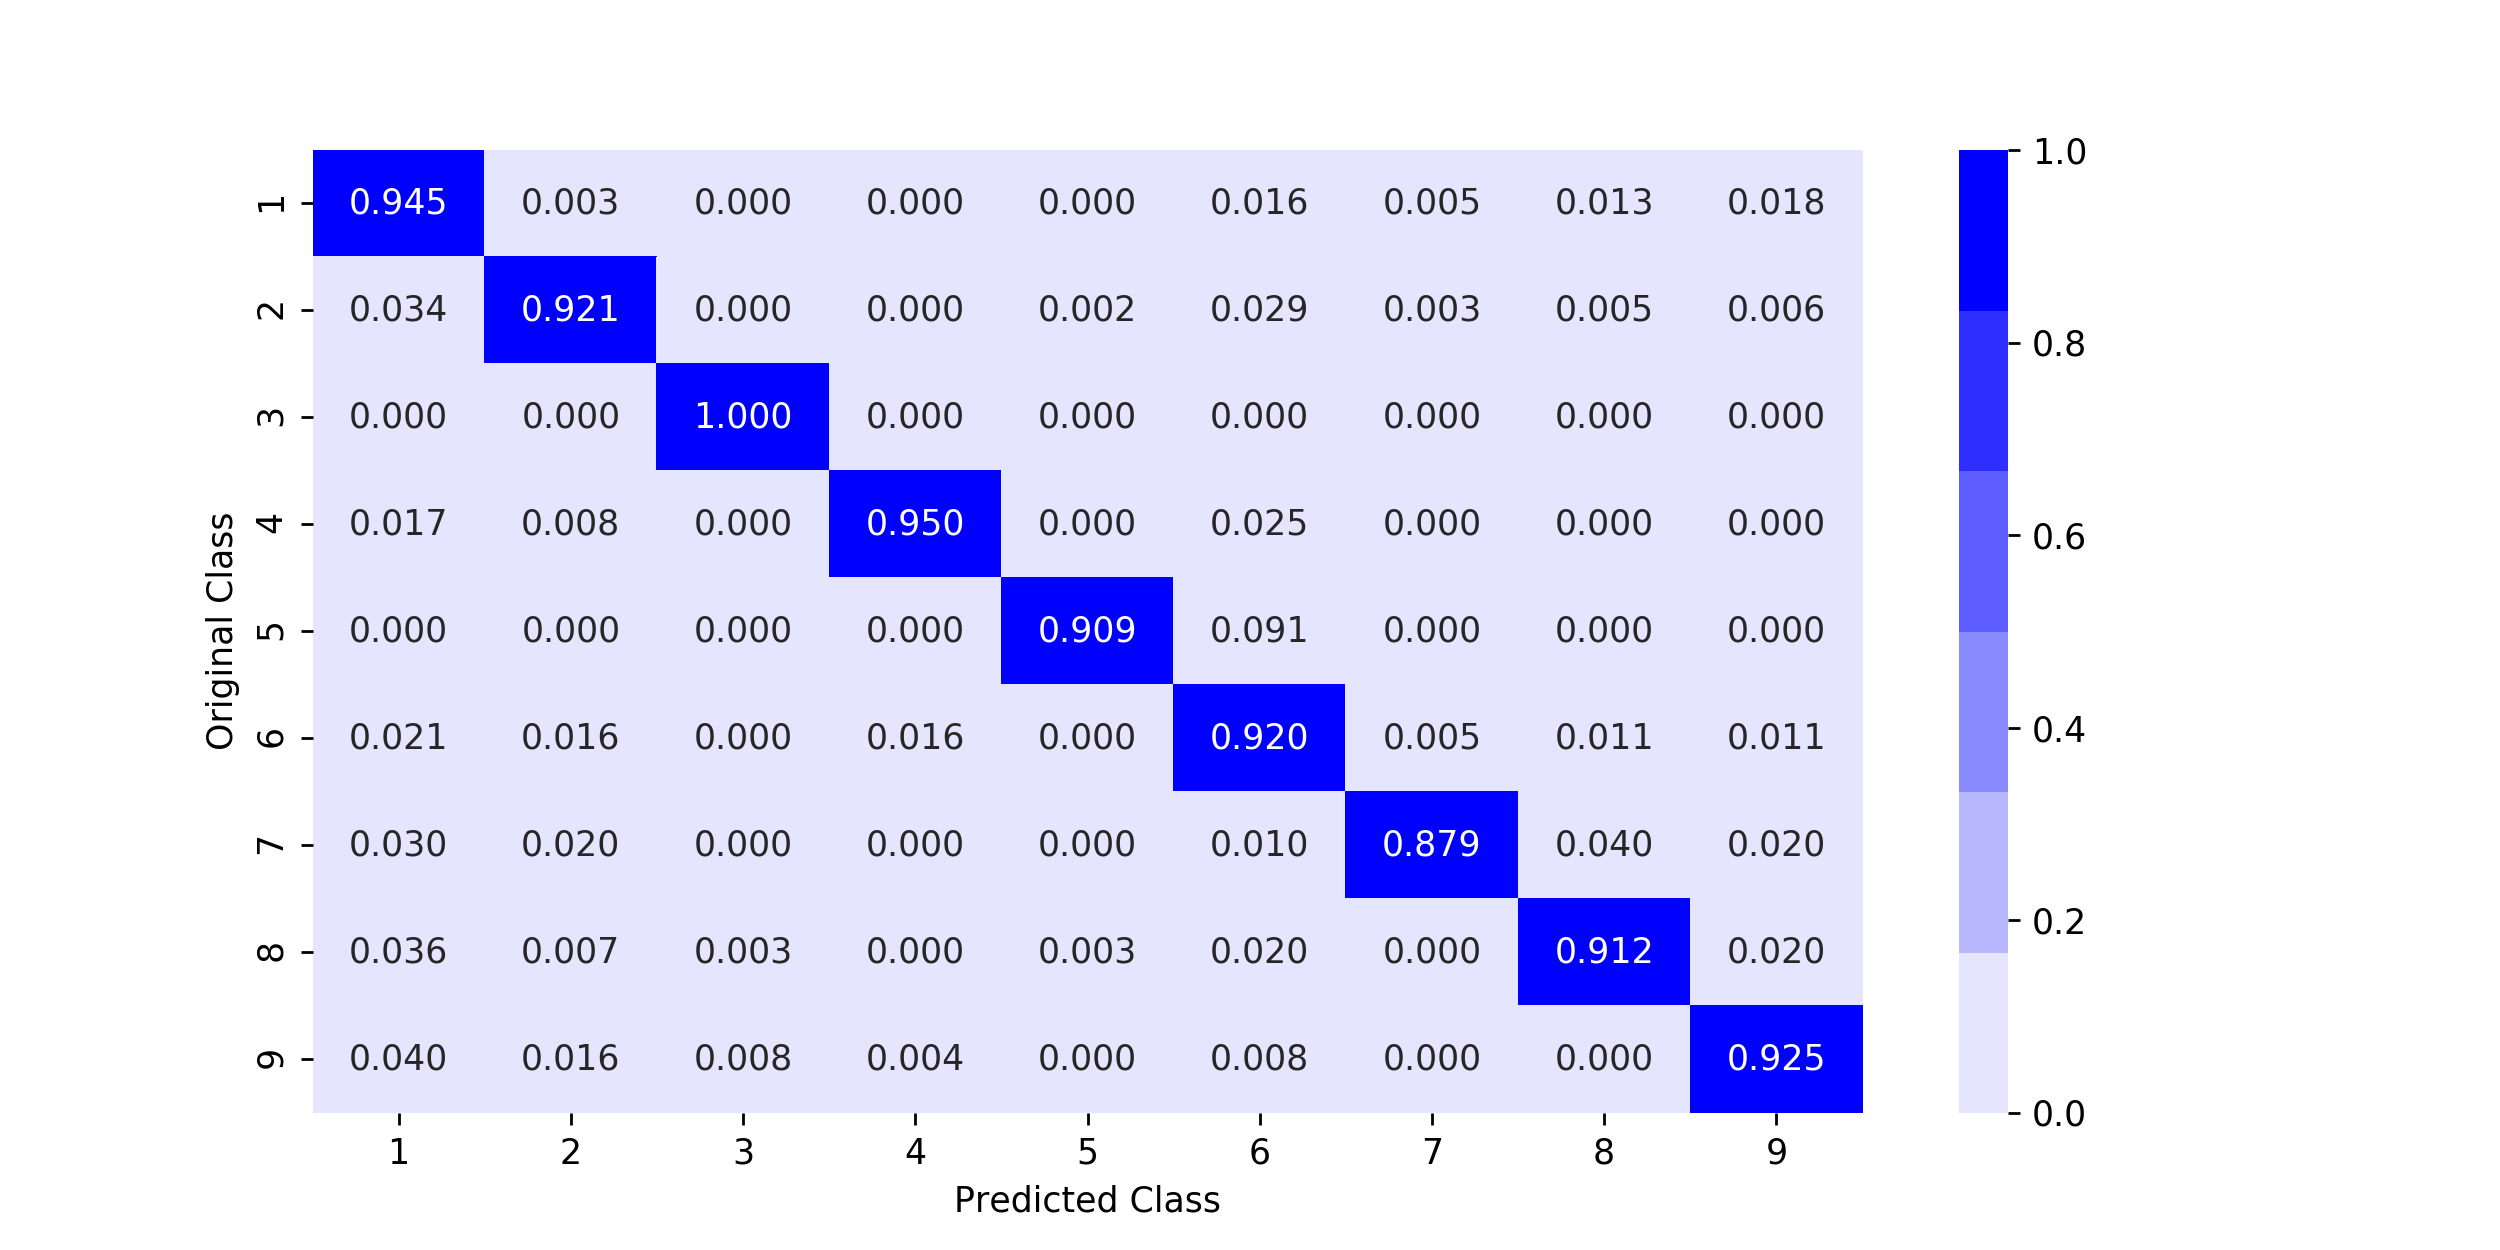

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [28]:
###############################KNN#######################

alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

log_loss for c =  10 is 0.12260187727964868
log_loss for c =  50 is 0.10793524919291551
log_loss for c =  100 is 0.10851099444302634
log_loss for c =  500 is 0.10897218398245759
log_loss for c =  1000 is 0.10855422520339479
log_loss for c =  2000 is 0.10887630870465319
log_loss for c =  3000 is 0.1088508543827713


<IPython.core.display.Javascript object>


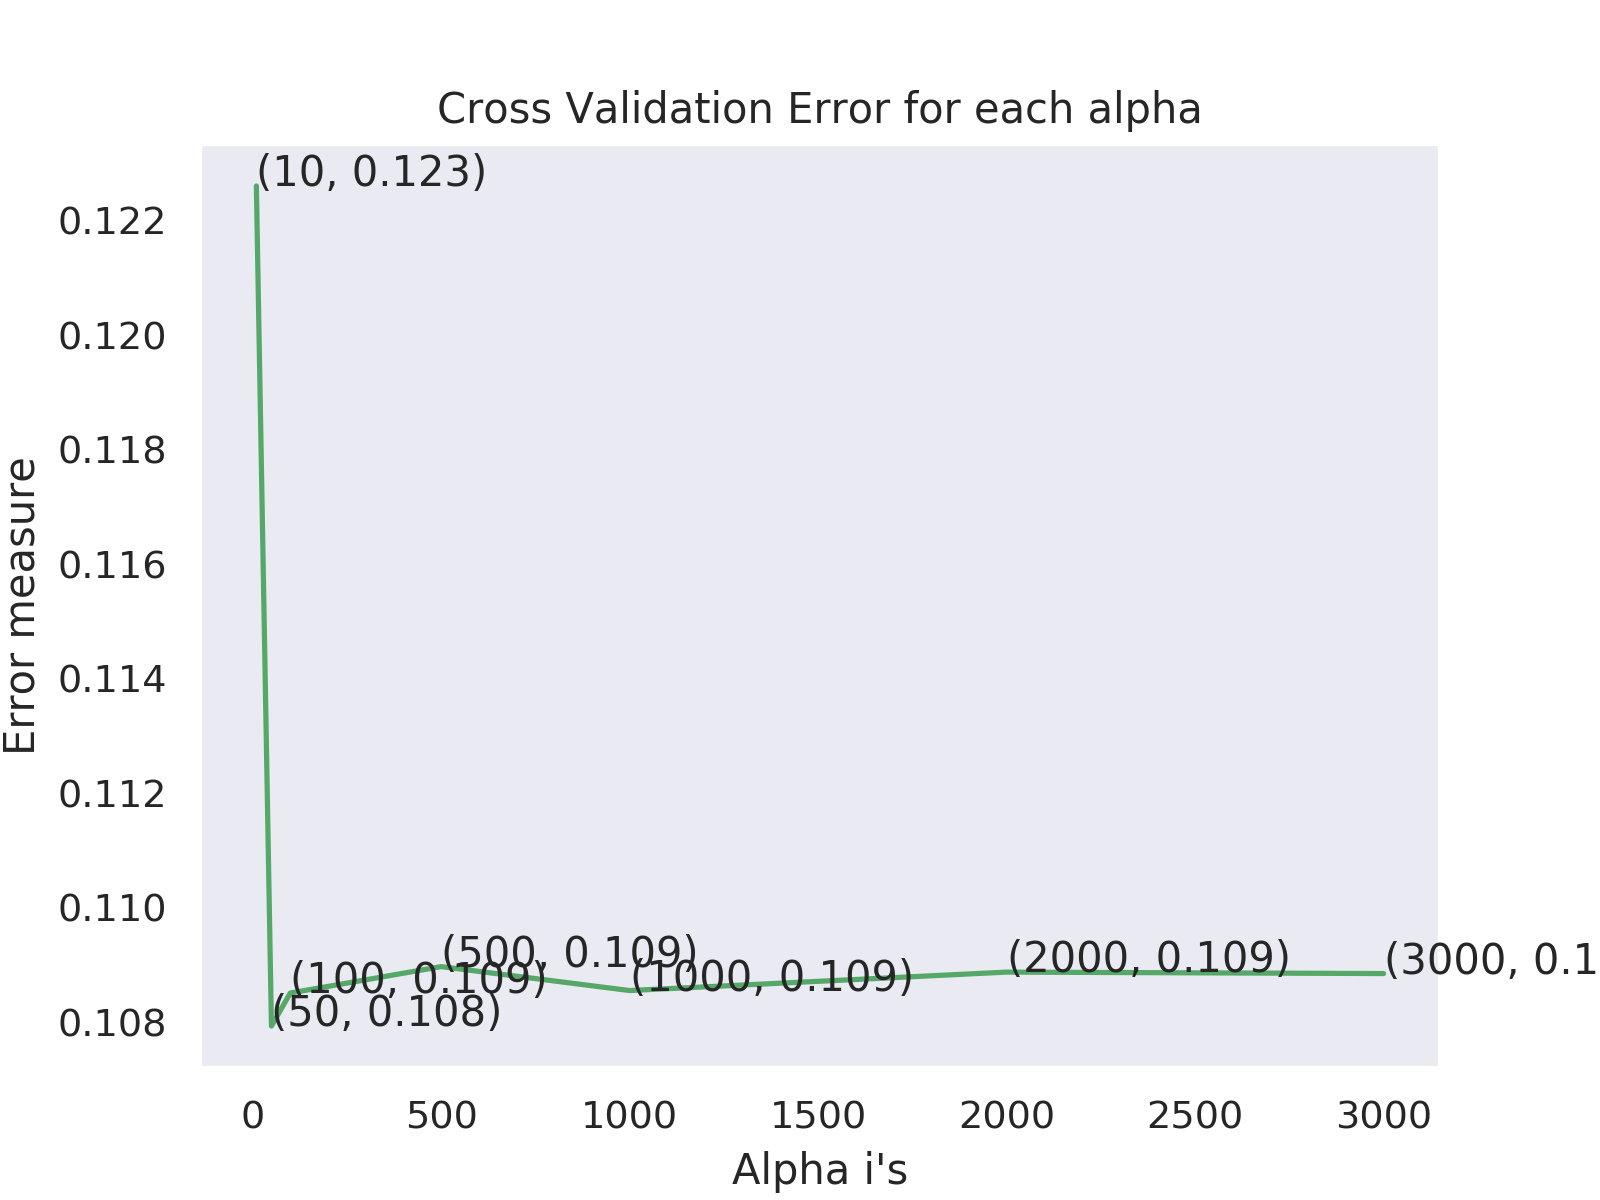

For values of best alpha =  50 The train log loss is: 0.029640476889548337
For values of best alpha =  50 The cross validation log loss is: 0.10793524919291551
For values of best alpha =  50 The test log loss is: 0.0901389083559883
Number of misclassified points  2.1715126978284873
================================================== Confusion matrix ==================================================


<IPython.core.display.Javascript object>


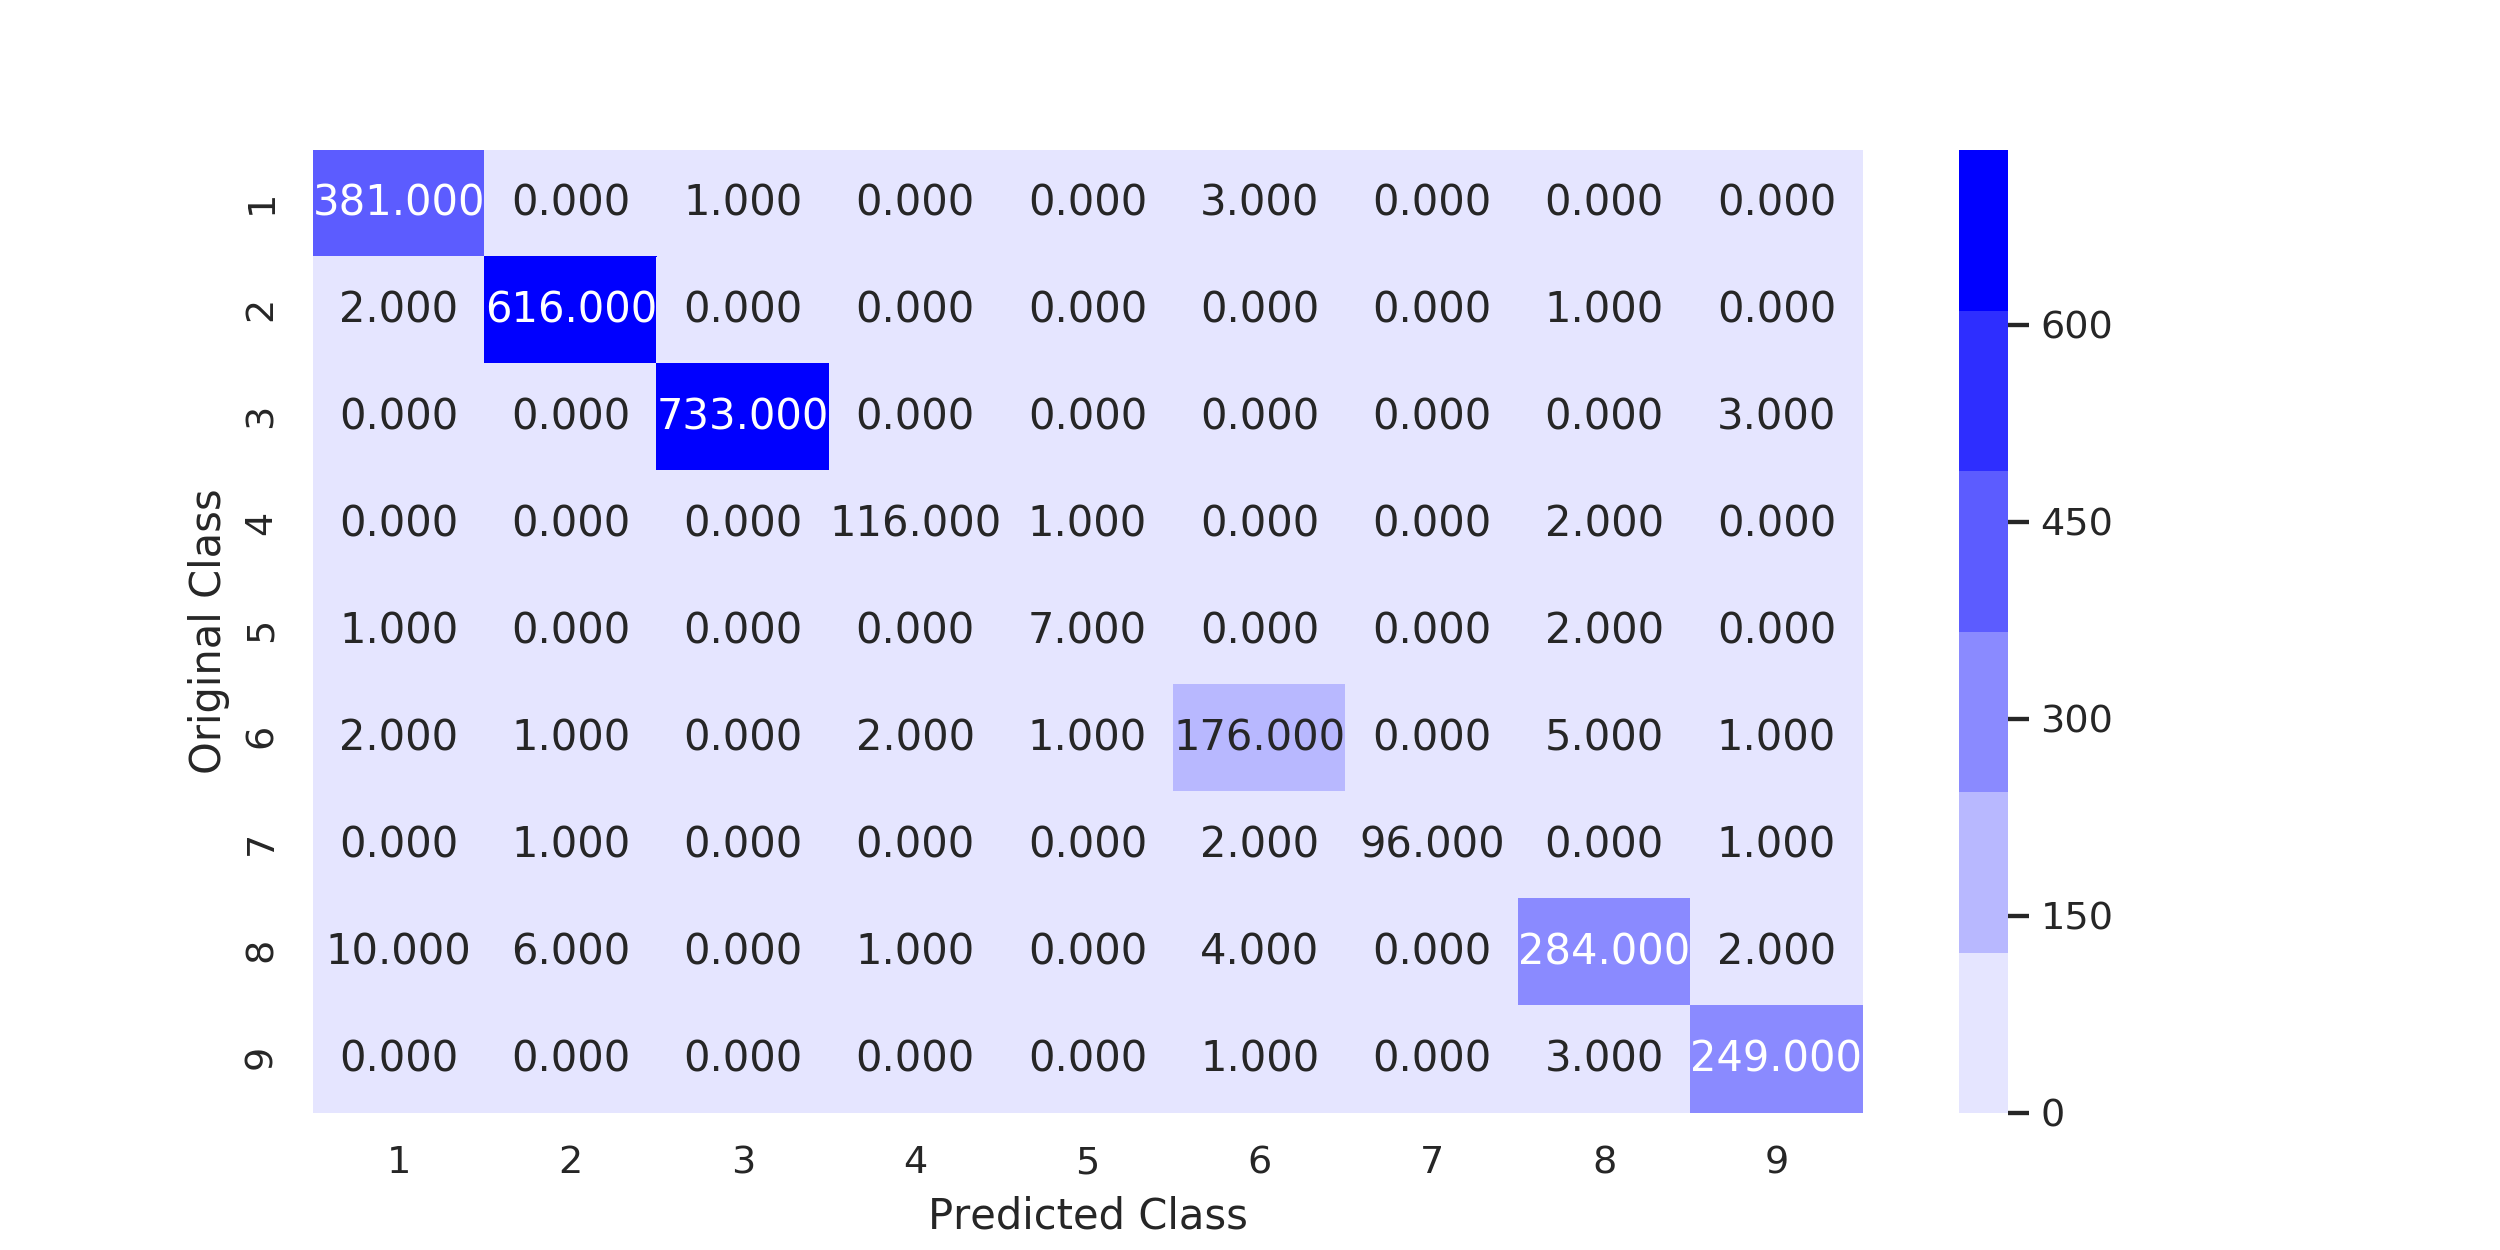

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


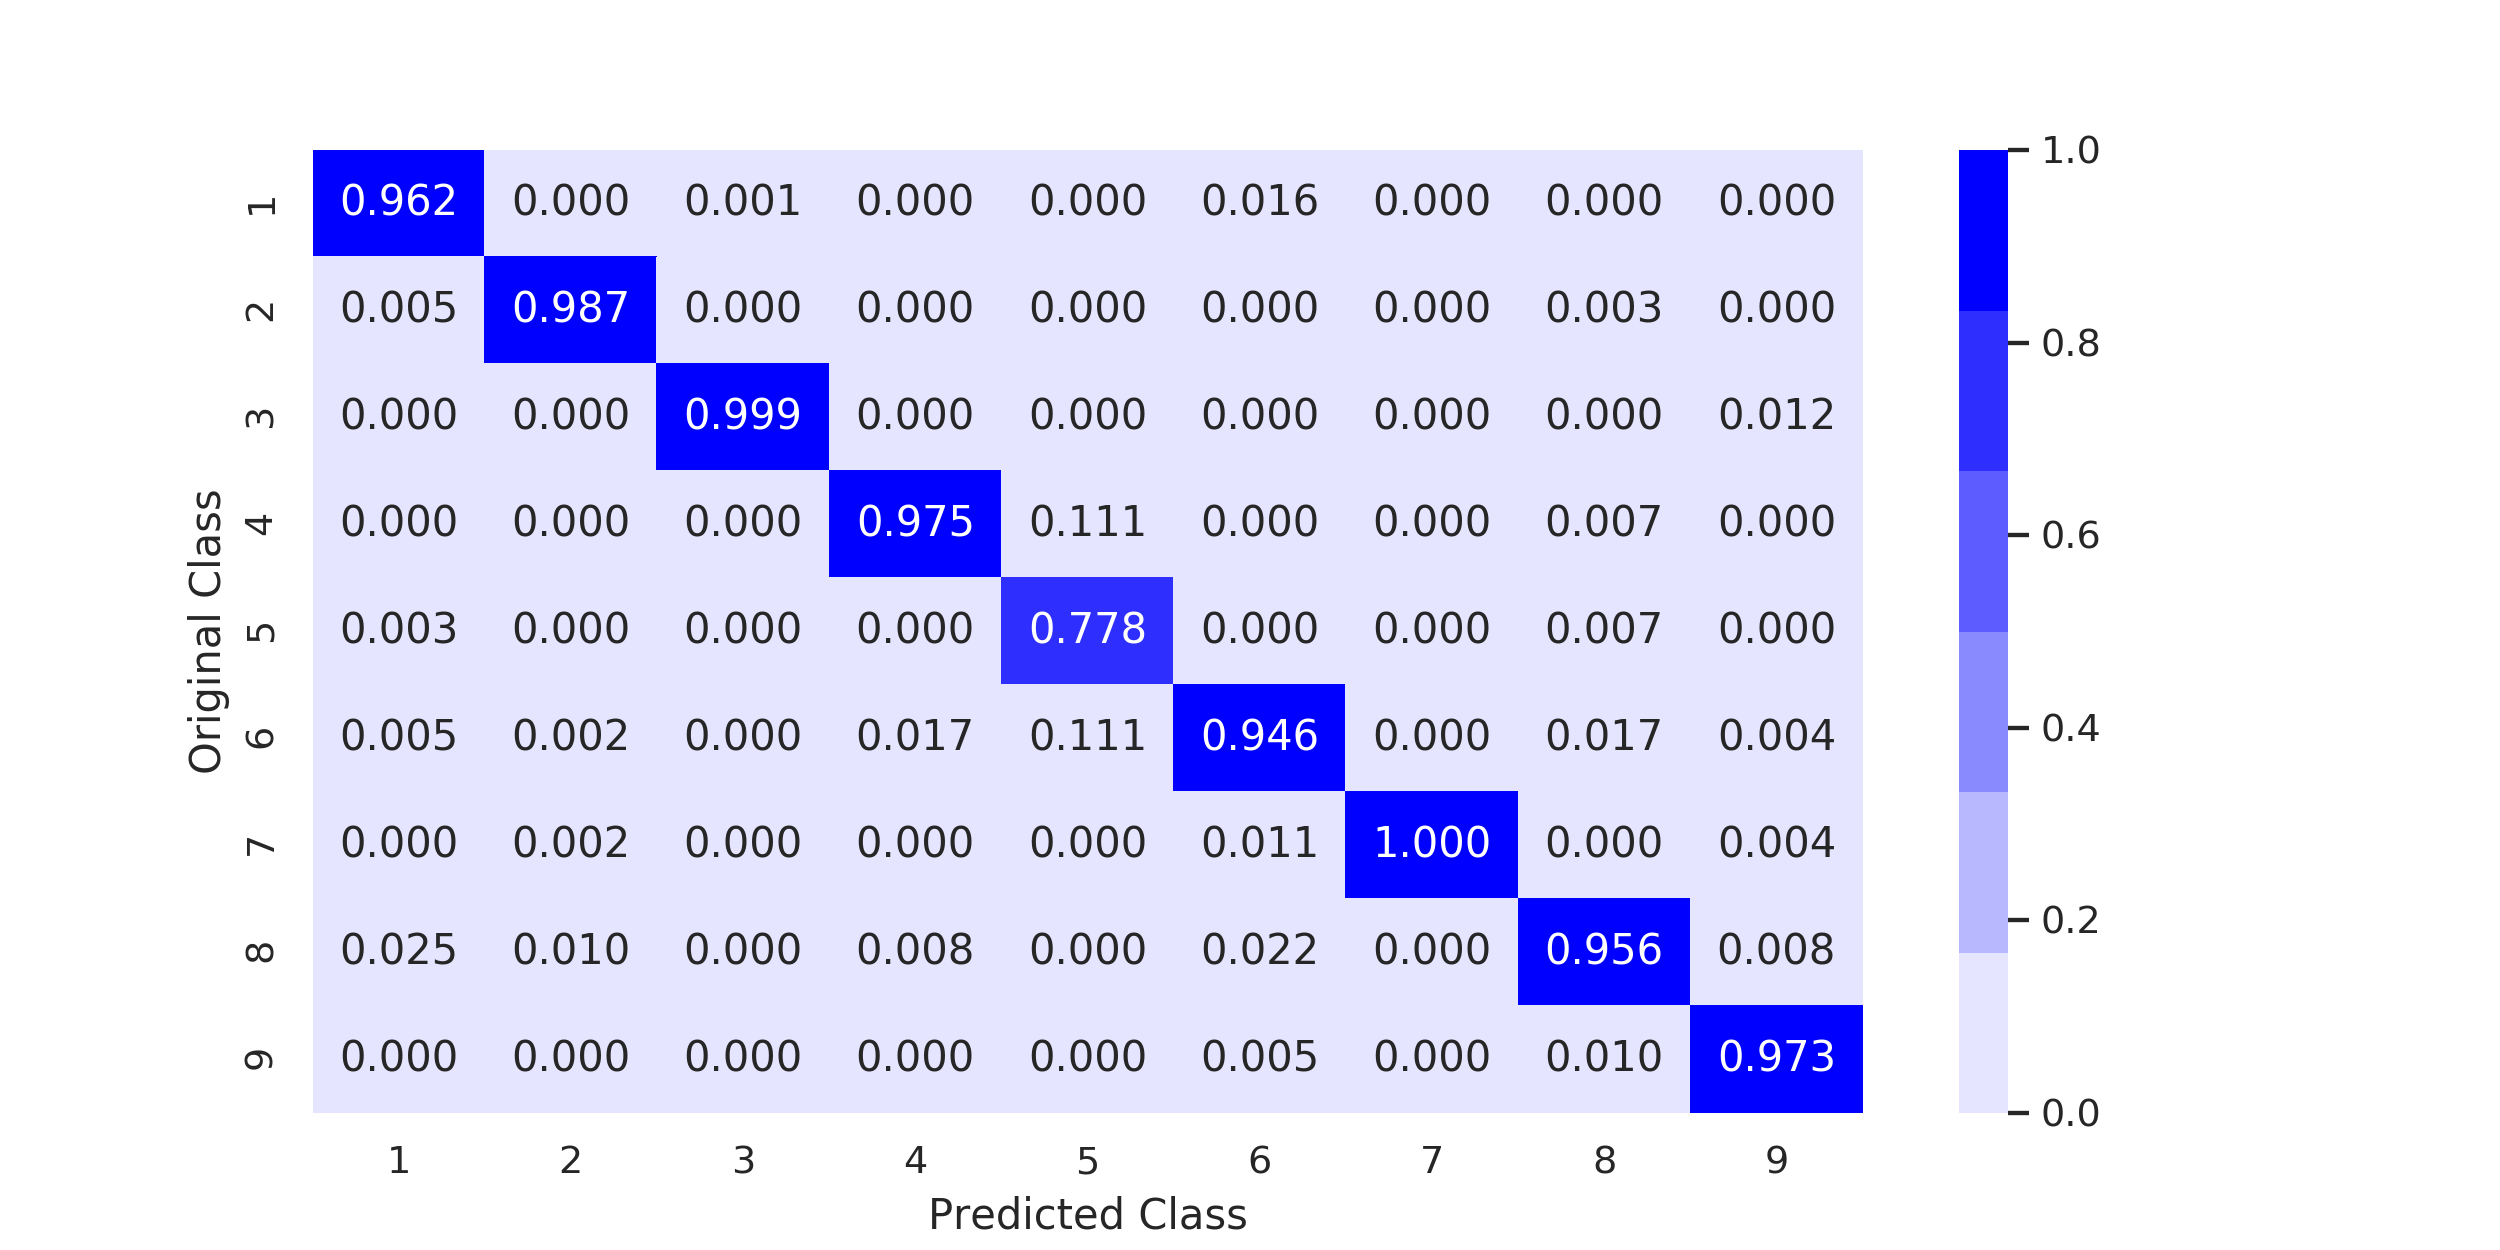

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


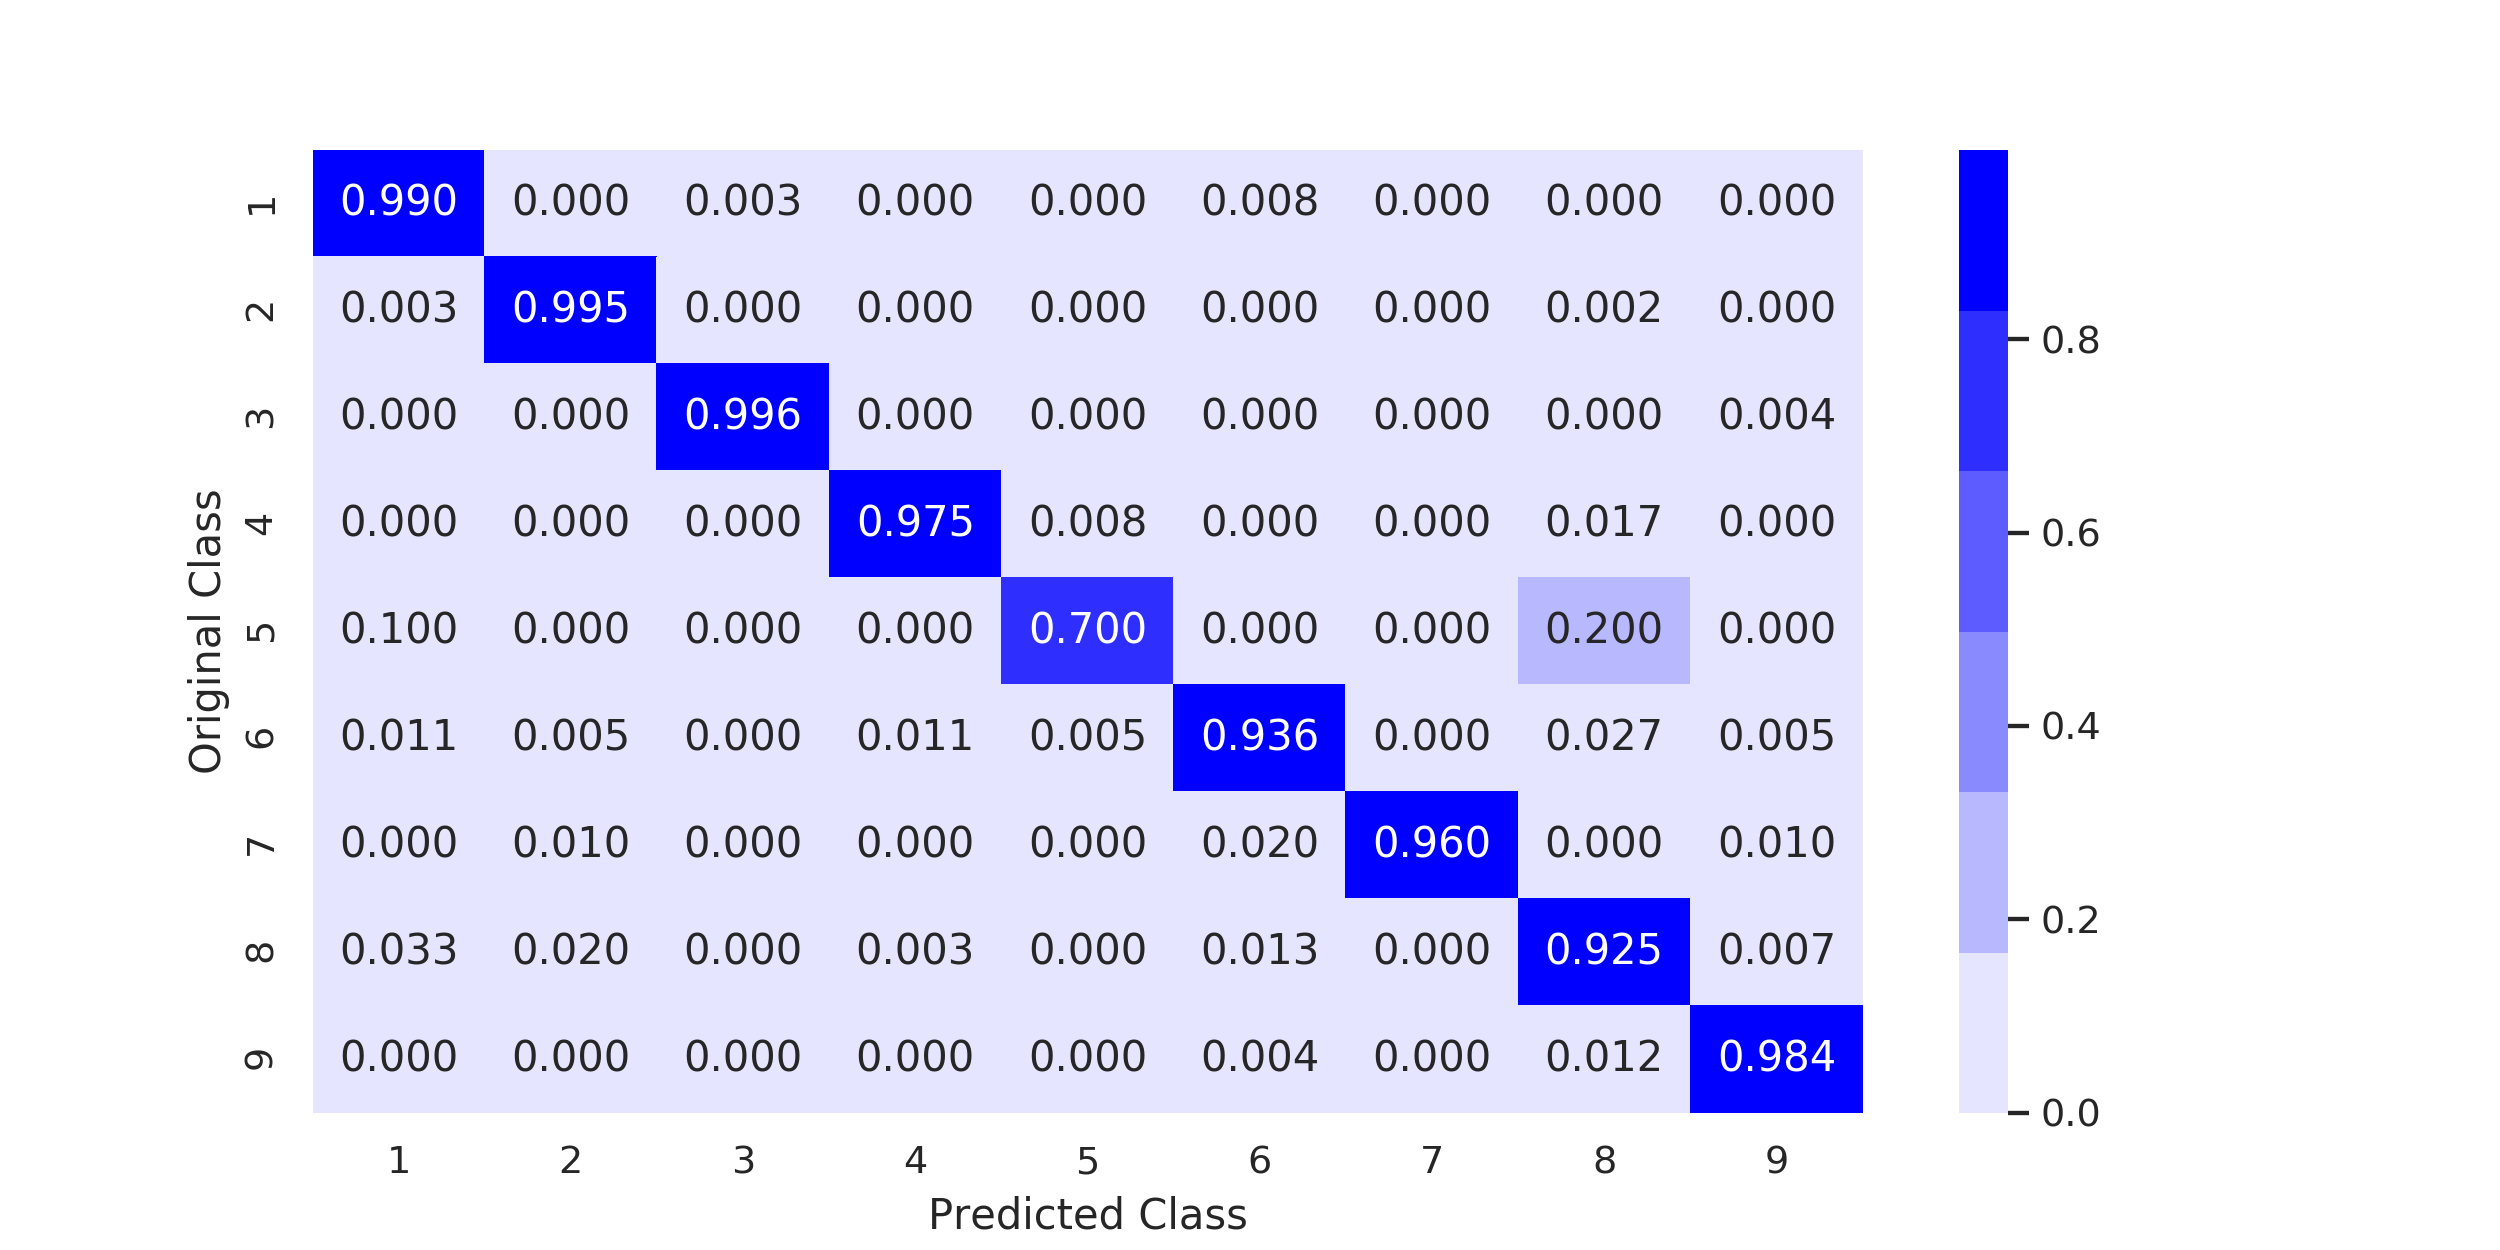

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [38]:
########
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

log_loss for c =  10 is 0.2036211011562975
log_loss for c =  50 is 0.1150341642281317
log_loss for c =  100 is 0.08743745793441515
log_loss for c =  500 is 0.07729659153240666
log_loss for c =  1000 is 0.0774769726347062
log_loss for c =  2000 is 0.07848893194189377


<IPython.core.display.Javascript object>


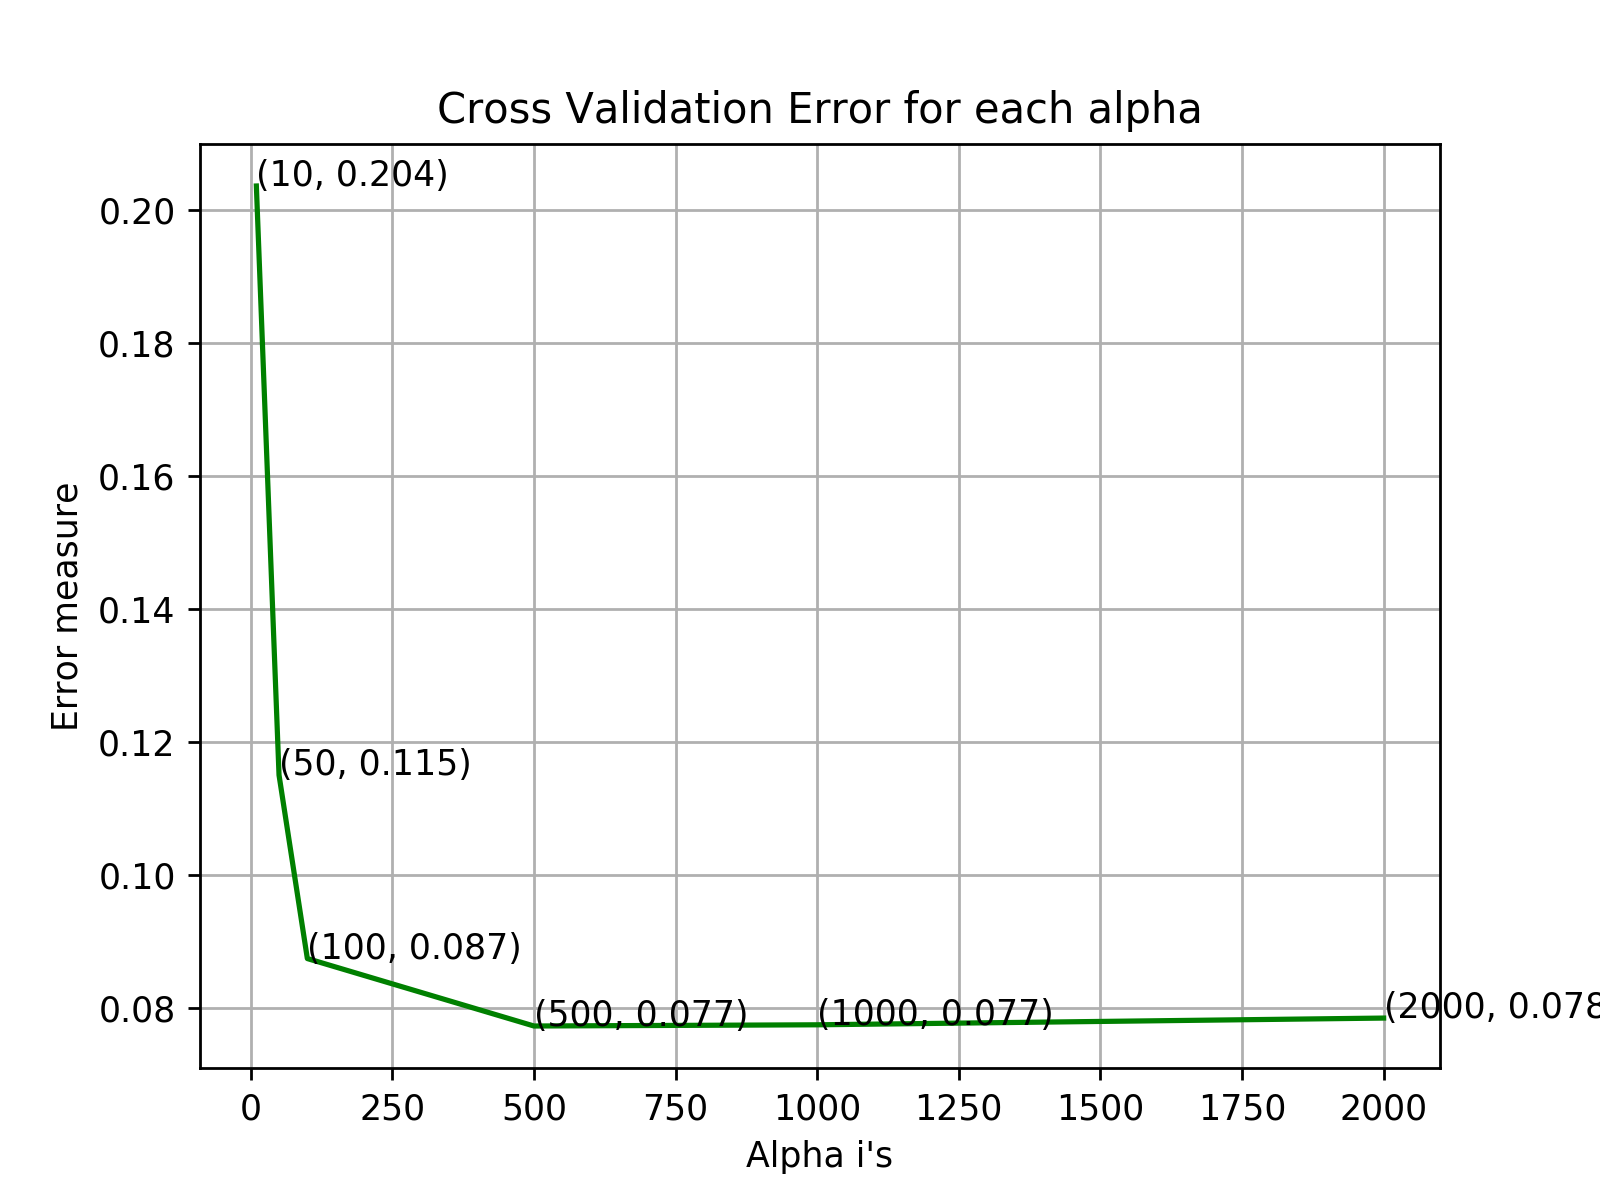

For values of best alpha =  500 The train log loss is: 0.02566046655174482
For values of best alpha =  500 The cross validation log loss is: 0.07729659153240666
For values of best alpha =  500 The test log loss is: 0.09497253848946526
Number of misclassified points  1.8770702981229297
================================================== Confusion matrix ==================================================


<IPython.core.display.Javascript object>


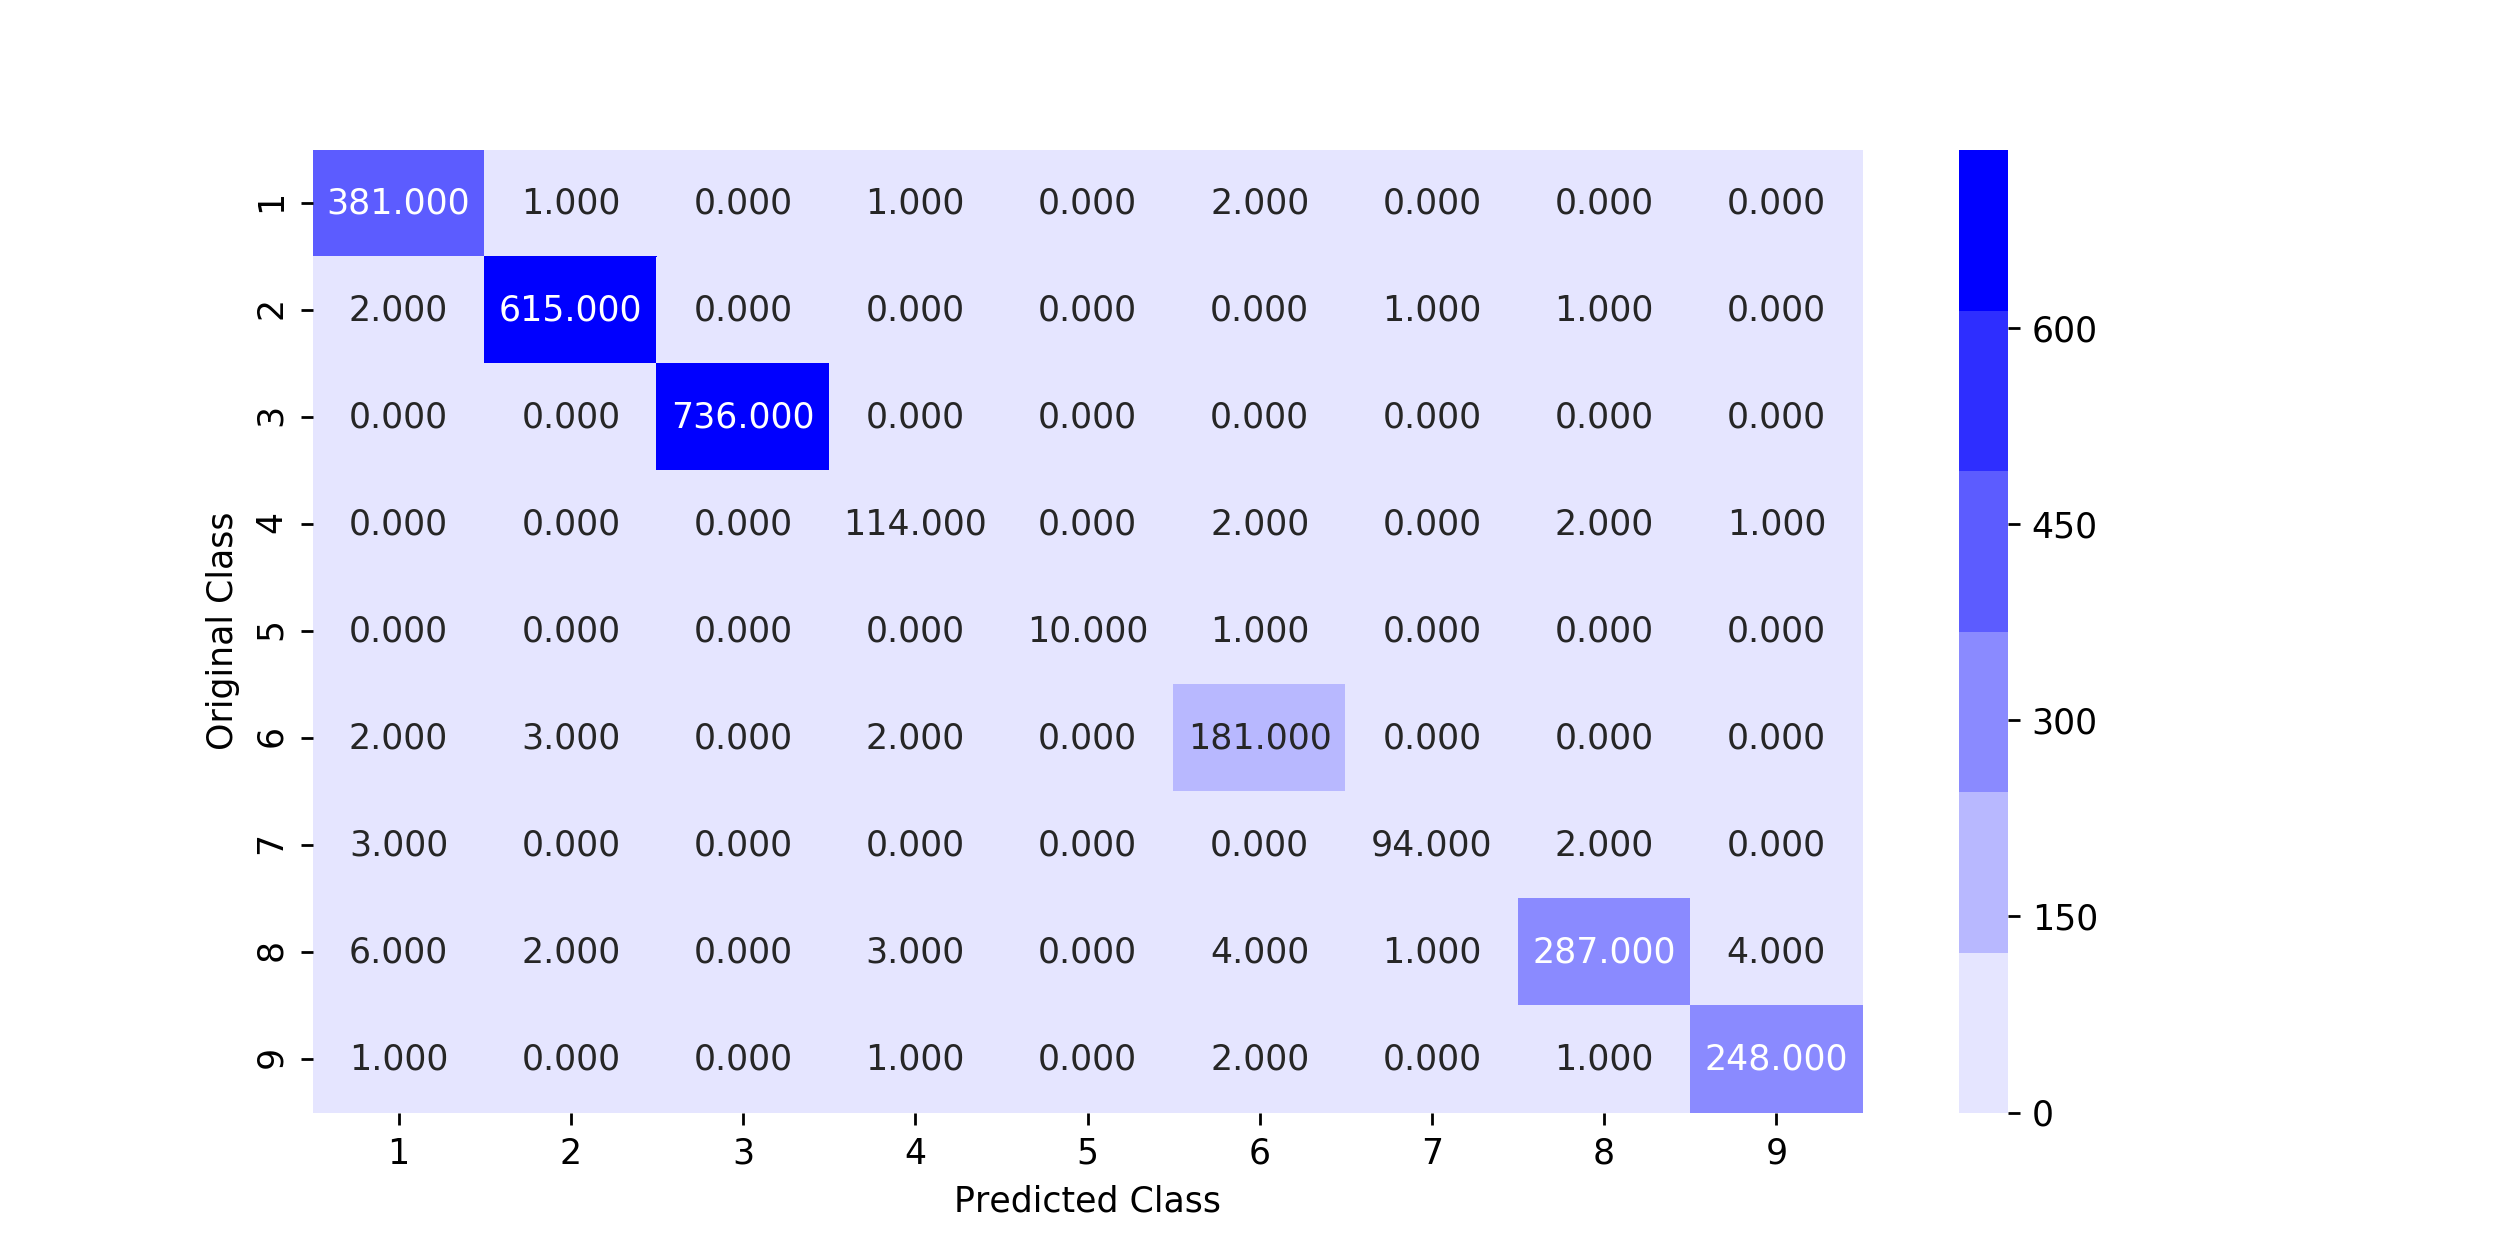

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


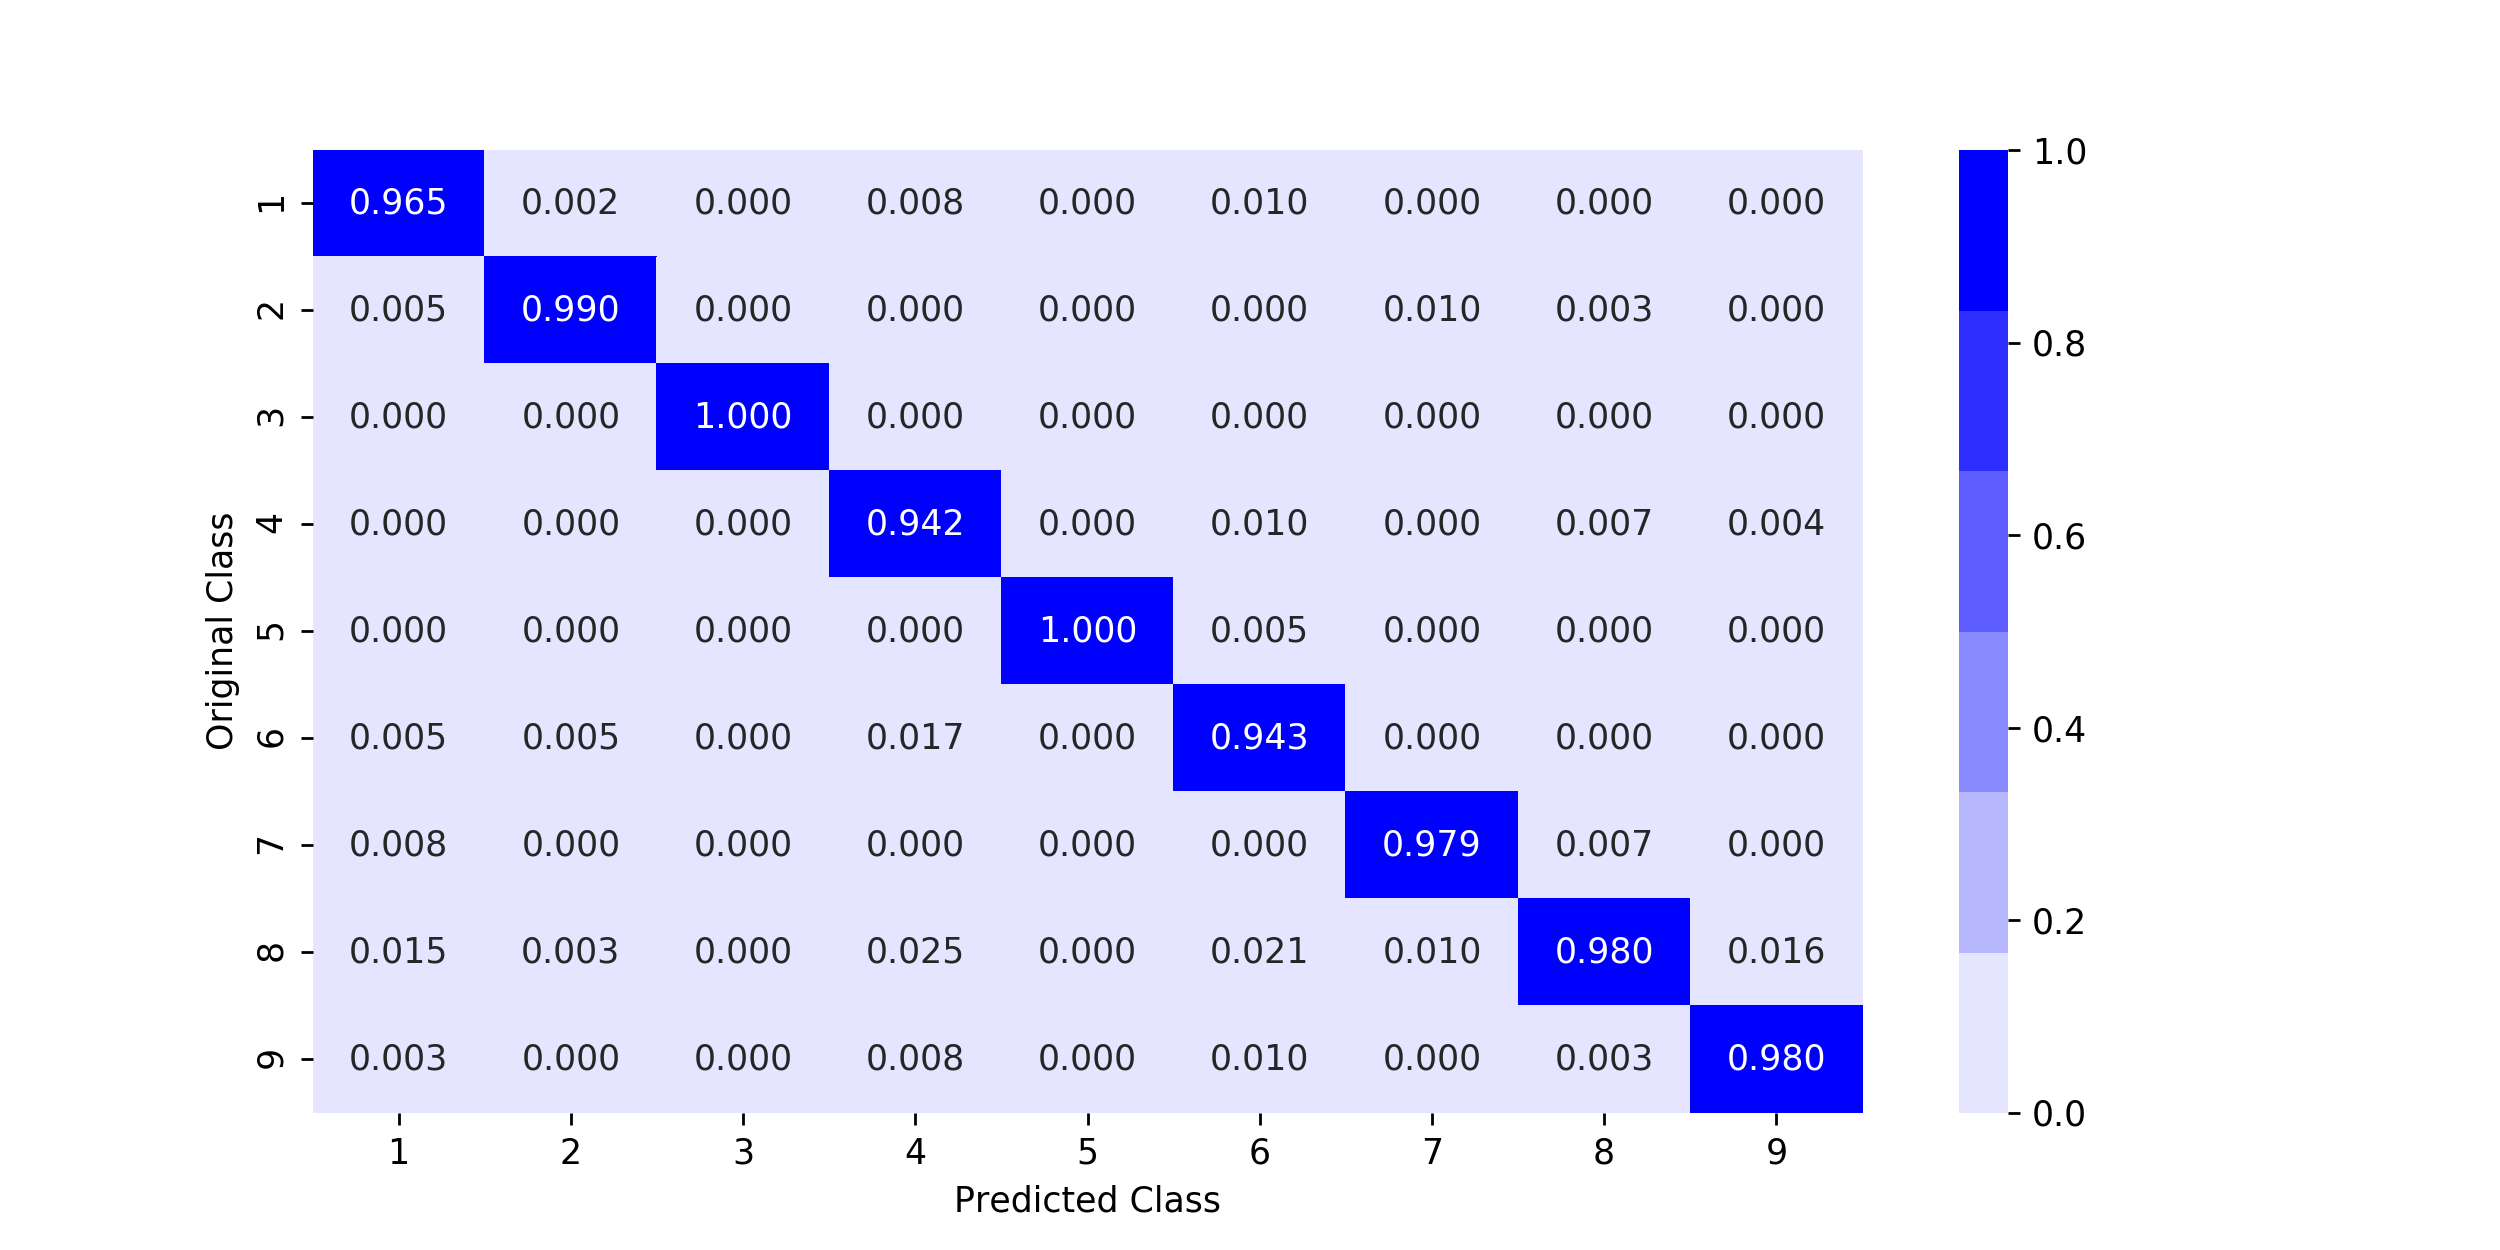

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


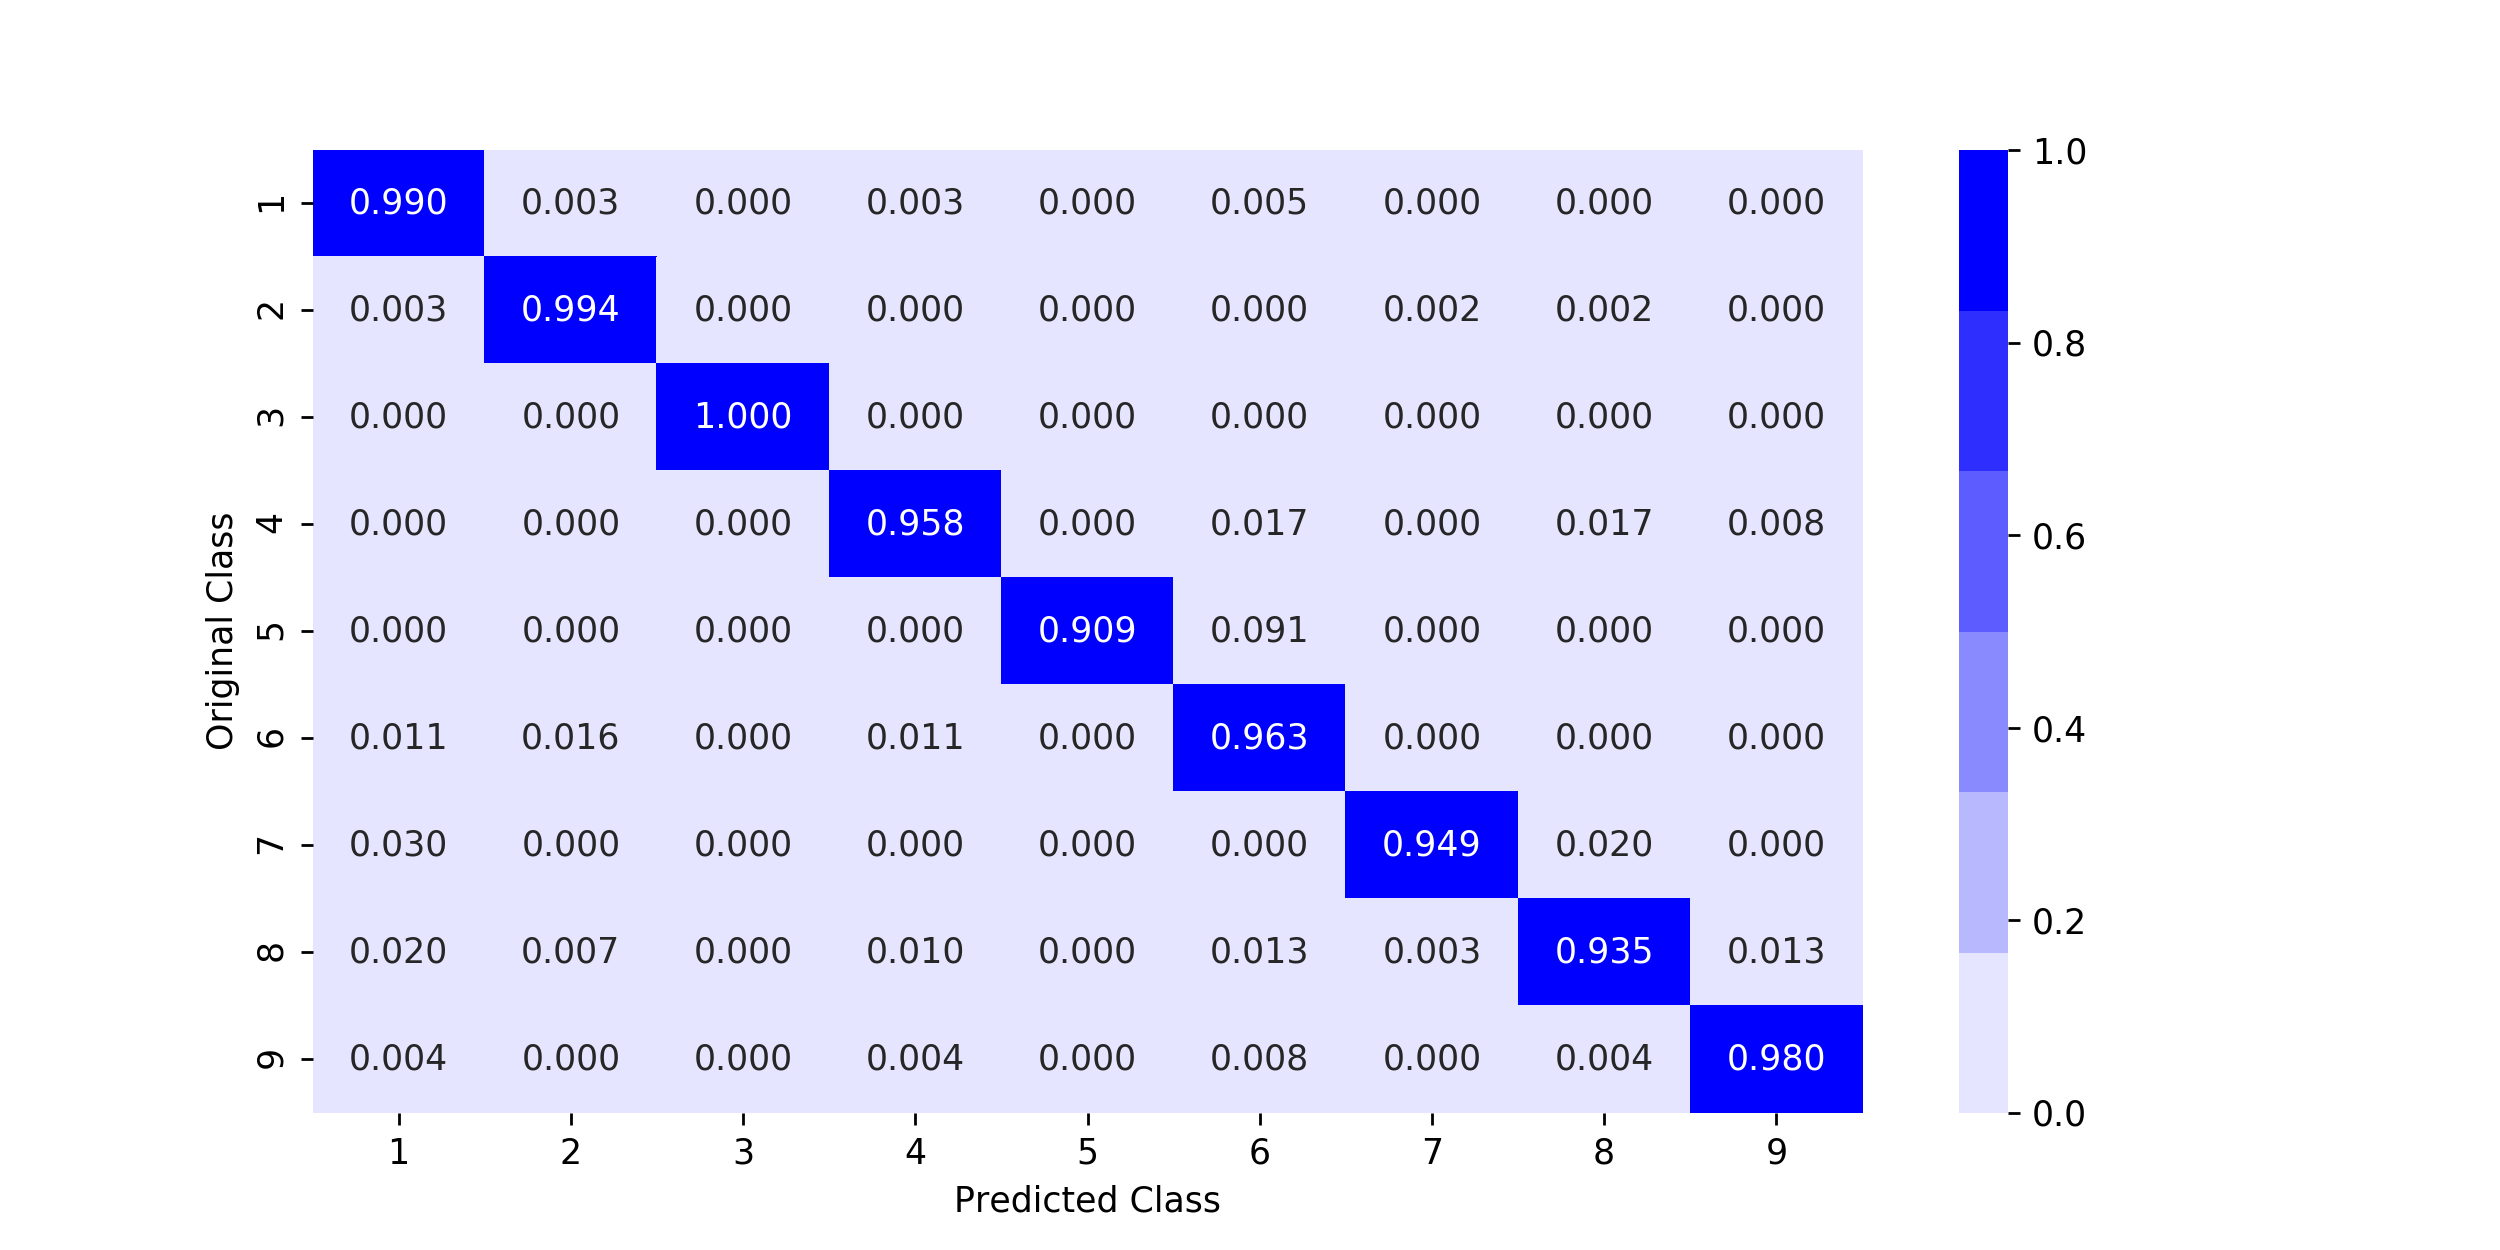

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [30]:
#####################Gradient boosting(XGBOOST)

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))